**Portfolio Project 1**

**Executive Summary**

Період аналізу: 1 листопада 2020 – 31 січня 2021

Мета: Проведено комплексний аналіз даних про продажі та маркетингову діяльність компанії з метою виявлення ключових драйверів росту, слабких місць та розробки стратегічних рекомендацій для підвищення ефективності.
Ключові висновки

    Сильна сезонність та чітка ринкова структура: Бізнес демонструє яскраво виражену сезонну залежність із піком продажів у святковий період (листопад-грудень). Левова частка доходу (близько 45% від загального) генерується ринком США, який є ідеальним відображенням глобальних трендів компанії.

    Збалансована та ефективна модель маркетингу: Стратегія залучення клієнтів є диверсифікованою та стійкою, спираючись на три основні канали: Organic Search (38% продажів), Paid Search (28%) та Direct (25%). Найважливіший висновок: коефіцієнт конверсії є статистично однаковим для всіх каналів, що свідчить про високу якість трафіку з усіх джерел. Головний спосіб збільшити продажі — збільшити кількість відвідувачів.

    Критичні проблеми в аналітиці: Виявлено значні неточності у відстеженні джерел трафіку (платна реклама помилково зараховується як органічна або потрапляє в категорію <Other>). Це унеможливлює коректну оцінку рентабельності інвестицій (ROAS) і є головною перешкодою для прийняття обґрунтованих маркетингових рішень.

    Розрив у користувацькому досвіді: Існує чіткий патерн поведінки: клієнти масово використовують мобільні пристрої для пошуку та ознайомлення з товарами, але фінальну покупку здійснюють переважно з десктопу. Це вказує на потенційні перешкоди на шляху до конверсії на мобільних пристроях.

Пріоритетні рекомендації

    Негайний аудит веб-аналітики (Пріоритет №1):
        Дія: Виправити відстеження джерел трафіку, налаштувати UTM-мітки та списки виключень для платіжних систем.
        Обґрунтування: Це фундаментальний крок, без якого неможливо точно виміряти ефективність маркетингових витрат.

    Оптимізація шляху клієнта "мобільний → десктоп":
        Дія: Забезпечити безшовний досвід, зокрема синхронізацію кошика між пристроями, та максимально спростити процес покупки на мобільній версії сайту.
        Обґрунтування: Зменшення перешкод на шляху клієнта напряму вплине на коефіцієнт конверсії та загальний дохід.

    Концентрація маркетингових зусиль:
        Дія: Продовжувати інвестувати в SEO для стабільного росту. Сконцентрувати основну частину бюджету платної реклами на святковому сезоні (кінець листопада – грудень) для отримання максимального ефекту.
        Обґрунтування: Дані підтверджують, що така стратегія є найбільш рентабельною, оскільки платний трафік найефективніше працює в періоди високого попиту.

Очікуваний результат: Реалізація цих рекомендацій дозволить отримати точне розуміння ефективності маркетингу, підвищити конверсію за рахунок покращення клієнтського досвіду та, як наслідок, збільшити загальну прибутковість бізнесу.

**1. За допомогою скрипта Python підключаюсь до бази даних в Google BigQuery (DA dataset)**

In [ ]:
!pip install --upgrade google-cloud-bigquery


In [ ]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd


In [ ]:
auth.authenticate_user()


In [ ]:
client = bigquery.Client(project="data-analytics-mate")


**2. На основі таблиць, наявних у базі даних, напишу запит у Python щоб створити датасет**

In [ ]:
query = """
SELECT
s.date,
s.ga_session_id,
sp.continent,
sp.country,
sp.device,
sp.browser,
sp.mobile_model_name,
sp.operating_system,
sp.language,
sp.medium,
sp.channel,
acs.account_id,
acc.is_verified,
acc.is_unsubscribed,
p.category,
p.name,
p.price,
p.short_description
FROM `DA.session` s
JOIN `DA.session_params` sp
ON s.ga_session_id = sp.ga_session_id
LEFT JOIN `DA.account_session` acs
ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `DA.account` acc
ON acs.account_id = acc.id
LEFT JOIN `DA.order` o
ON s.ga_session_id = o.ga_session_id
LEFT JOIN `DA.product` p
ON o.item_id = p.item_id
"""


query_job = client.query(query)
results = query_job.result()
df = results.to_dataframe()
df

,date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,medium,channel,account_id,is_verified,is_unsubscribed,category,name,price,short_description
0,2021-01-19,7268004754,(not set),(not set),desktop,Chrome,Chrome,Web,en-gb,(none),Direct,<NA>,<NA>,<NA>,None,None,NaN,None
1,2021-01-06,8321293308,(not set),(not set),desktop,Chrome,Chrome,Web,None,(none),Direct,<NA>,<NA>,<NA>,None,None,NaN,None
2,2020-11-05,4392362373,(not set),(not set),desktop,Chrome,Chrome,Web,None,organic,Organic Search,<NA>,<NA>,<NA>,None,None,NaN,None
3,2020-12-09,140108698,(not set),(not set),desktop,Chrome,Safari,Web,en-us,(none),Direct,<NA>,<NA>,<NA>,None,None,NaN,None
4,2020-11-10,8351127264,(not set),(not set),mobile,Safari,iPhone,Web,en-us,organic,Organic Search,<NA>,<NA>,<NA>,None,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349540,2020-11-25,353517,Americas,Canada,desktop,Chrome,Safari,Macintosh,None,(data deleted),Undefined,<NA>,<NA>,<NA>,None,None,NaN,None
349541,2020-11-09,2536581233,Americas,United States,desktop,Chrome,Safari,Macintosh,None,(data deleted),Undefined,<NA>,<NA>,<NA>,None,None,NaN,None
349542,2021-01-02,2149190429,Americas,Canada,desktop,Chrome,Safari,Macintosh,de,(data deleted),Undefined,<NA>,<NA>,<NA>,None,None,NaN,None
349543,2021-01-08,6004211753,Americas,United States,desktop,Chrome,Safari,Macintosh,None,(data deleted),Undefined,<NA>,<NA>,<NA>,None,None,NaN,None


**3. Зроблю короткий опис отриманого датасету**

In [ ]:
import pandas as pd
import io


df.columns = ['date', 'ga_session_id', 'continent', 'country', 'device', 'browser', 'mobile_model_name', 'operating_system', 'language', 'medium', 'channel', 'account_id', 'is_verified', 'is_unsubscribed', 'category', 'name', 'price', 'short_description']
df['date'] = pd.to_datetime(df['date'])

total_cols = df.shape[1]
print(f"1. Загальна кількість колонок: {total_cols}\n")


numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(f"2. Кількість числових колонок: {len(numeric_cols)}")
if numeric_cols:
    print(f"   - Назви: {numeric_cols}\n")

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"3. Кількість категоріальних колонок: {len(categorical_cols)}")
if categorical_cols:
    print(f"   - Назви: {categorical_cols}\n")

datetime_cols = df.select_dtypes(include=['datetime']).columns.tolist()
print(f"4. Кількість колонок типу datetime: {len(datetime_cols)}")
if datetime_cols:
    print(f"   - Назви: {datetime_cols}\n")

unique_sessions = df['ga_session_id'].nunique()
print(f"5. Кількість унікальних сесій: {unique_sessions}\n")

date_range_start = df['date'].min().strftime('%Y-%m-%d')
date_range_end = df['date'].max().strftime('%Y-%m-%d')
print(f"6. Період часу: з {date_range_start} до {date_range_end}\n")

missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
df_with_na = df.replace(missing_placeholders, pd.NA)
missing_values = df_with_na.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("7. Пропущені значення:")
if not missing_values.empty:
    print("   Так, є пропущені значення. Розподіл по колонках:")
    print(missing_values.to_string())
else:
    print("   Пропущених значень не знайдено.")

1. Загальна кількість колонок: 18

2. Кількість числових колонок: 5
   - Назви: ['ga_session_id', 'account_id', 'is_verified', 'is_unsubscribed', 'price']

3. Кількість категоріальних колонок: 12
   - Назви: ['continent', 'country', 'device', 'browser', 'mobile_model_name', 'operating_system', 'language', 'medium', 'channel', 'category', 'name', 'short_description']

4. Кількість колонок типу datetime: 1
   - Назви: ['date']

5. Кількість унікальних сесій: 349545

6. Період часу: з 2020-11-01 до 2021-01-31

7. Пропущені значення:
   Так, є пропущені значення. Розподіл по колонках:
is_unsubscribed      321600
is_verified          321600
account_id           321600
price                316007
name                 316007
short_description    316007
category             316007
language             114266
medium                21859
country                2808
continent               795


**Аналіз набору даних 📊**

Набір даних складається з 18 колонок, які можна логічно згрупувати:

    Ідентифікатори сесії: date, ga_session_id.

    Параметри сесії (Технології та Географія): continent, country, device, browser, operating_system, language, mobile_model_name.

    Джерела Трафіку: medium, channel.

    Дані Акаунту Користувача: account_id, is_verified, is_unsubscribed.

    Дані про Замовлення та Товари: category, name, price, short_description.

Ключові Характеристики та Інсайти

    Переважання гостьових сесій: Близько 92% всіх сесій належать неавторизованим користувачам, що є типовим для багатьох онлайн-бізнесів.

    Коефіцієнт конверсії: Лише близько 9.5% унікальних сесій завершуються покупкою. Це базовий показник, який можна покращувати.
    
    Повнота даних: Дані про акаунти та покупки є лише для підмножини сесій. Це результат використання LEFT JOIN у запиті, що є правильною практикою для збереження всіх сесій (як з покупками, так і без).

**4. Дам відповіді на питання:**

4.1. На яких континентах (топ-3) та в яких країнах (топ-5) наша компанія має найбільші продажі? найбільшу кількість замовлень?

In [ ]:
sales_df = df[df['price'] > 0].copy()

print(f"Дані успішно підготовлено. Знайдено {len(sales_df)} рядків з продажами для аналізу.\n")
print("--- 💰 АНАЛІЗ ЗА СУМОЮ ПРОДАЖІВ ---")


sales_by_continent = sales_df.groupby('continent')['price'].sum().sort_values(ascending=False)
print("\n🏆 Топ-3 континенти за СУМОЮ продажів:")
print(sales_by_continent.head(3).to_string())
sales_by_country = sales_df.groupby('country')['price'].sum().sort_values(ascending=False)

print("\n🏆 Топ-5 країн за СУМОЮ продажів:")
print(sales_by_country.head(5).to_string())

print("\n\n--- 📦 АНАЛІЗ ЗА КІЛЬКІСТЮ ЗАМОВЛЕНЬ ---")

orders_by_continent = sales_df.groupby('continent')['price'].count().sort_values(ascending=False)

print("\n🏆 Топ-3 континенти за КІЛЬКІСТЮ замовлень:")
print(orders_by_continent.head(3).to_string())

orders_by_country = sales_df.groupby('country')['price'].count().sort_values(ascending=False)

print("\n🏆 Топ-5 країн за КІЛЬКІСТЮ замовлень:")
print(orders_by_country.head(5).to_string())

Дані успішно підготовлено. Знайдено 33538 рядків з продажами для аналізу.

--- 💰 АНАЛІЗ ЗА СУМОЮ ПРОДАЖІВ ---

🏆 Топ-3 континенти за СУМОЮ продажів:
continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2

🏆 Топ-5 країн за СУМОЮ продажів:
country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8


--- 📦 АНАЛІЗ ЗА КІЛЬКІСТЮ ЗАМОВЛЕНЬ ---

🏆 Топ-3 континенти за КІЛЬКІСТЮ замовлень:
continent
Americas    18553
Asia         7950
Europe       6261

🏆 Топ-5 країн за КІЛЬКІСТЮ замовлень:
country
United States     14673
India              3029
Canada             2560
United Kingdom     1029
France              678


4.2. Знайди топ-10 категорій товарів за загальною сумою продажів

Помилка при зчитуванні файлу: [Errno 2] No such file or directory: 'your_data_file.csv'
Перевірте, чи правильна назва файлу та чи він завантажений у Colab.
Дані підготовлено. Знайдено 33538 проданих товарів для аналізу.

--- 🏆 Топ-10 категорій за загальною сумою продажів ---
category
Sofas & armchairs                   8388254.5
Chairs                              6147748.8
Beds                                4919725.0
Bookcases & shelving units          3640818.1
Cabinets & cupboards                2336499.5
Outdoor furniture                   2142222.2
Tables & desks                      1790307.5
Chests of drawers & drawer units     906562.5
Bar furniture                        735503.0
Children's furniture                 467697.0


--- 📊 Графік топ-10 категорій ---


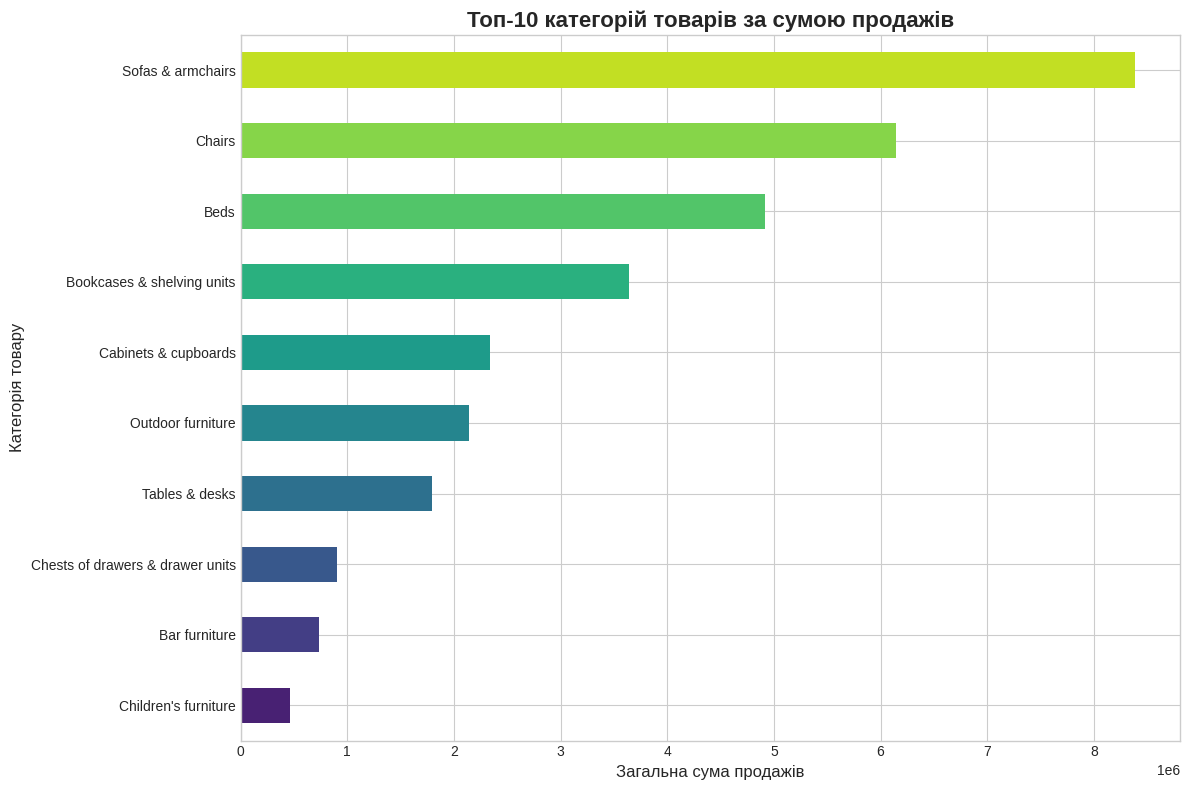

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_name = 'your_data_file.csv'
try:
    df = pd.read_csv(file_name, header=None)
    df.columns = ['date', 'ga_session_id', 'continent', 'country', 'device', 'browser', 'mobile_model_name', 'operating_system', 'language', 'medium', 'channel', 'account_id', 'is_verified', 'is_unsubscribed', 'category', 'name', 'price', 'short_description']
except Exception as e:
    print(f"Помилка при зчитуванні файлу: {e}")
    print("Перевірте, чи правильна назва файлу та чи він завантажений у Colab.")

missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
df.replace(missing_placeholders, pd.NA, inplace=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['price', 'category'], inplace=True)

sales_df = df[df['price'] > 0].copy()
print(f"Дані підготовлено. Знайдено {len(sales_df)} проданих товарів для аналізу.\n")

print("--- 🏆 Топ-10 категорій за загальною сумою продажів ---")

top_10_categories = sales_df.groupby('category')['price'].sum().sort_values(ascending=False).head(10)
print(top_10_categories.to_string())

print("\n\n--- 📊 Графік топ-10 категорій ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
top_10_categories.sort_values(ascending=True).plot(kind='barh', color=sns.color_palette("viridis", 10))

plt.xlabel('Загальна сума продажів', fontsize=12)
plt.ylabel('Категорія товару', fontsize=12)
plt.title('Топ-10 категорій товарів за сумою продажів', fontsize=16, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

4.3. Знайди топ-10 категорій товарів у країні з найбільшими продажами, чи відрізняється ситуація від загальної?

Дані успішно підготовлено для аналізу.

--- 🌍 Країна з найбільшими продажами: United States ---
Загальна сума продажів у цій країні: 13,943,553.90

--- 🏆 Топ-10 категорій у країні 'United States' ---
category
Sofas & armchairs                   3707144.5
Chairs                              2619773.8
Beds                                2213058.0
Bookcases & shelving units          1567606.9
Cabinets & cupboards                 994545.5
Outdoor furniture                    929245.2
Tables & desks                       777865.0
Chests of drawers & drawer units     382388.0
Bar furniture                        330805.0
Children's furniture                 207575.0


/tmp/ipython-input-9-3247419073.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_top_10.values, y=overall_top_10.index, ax=ax1, palette='viridis')
/tmp/ipython-input-9-3247419073.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories_in_country.values, y=top_10_categories_in_country.index, ax=ax2, palette='plasma')


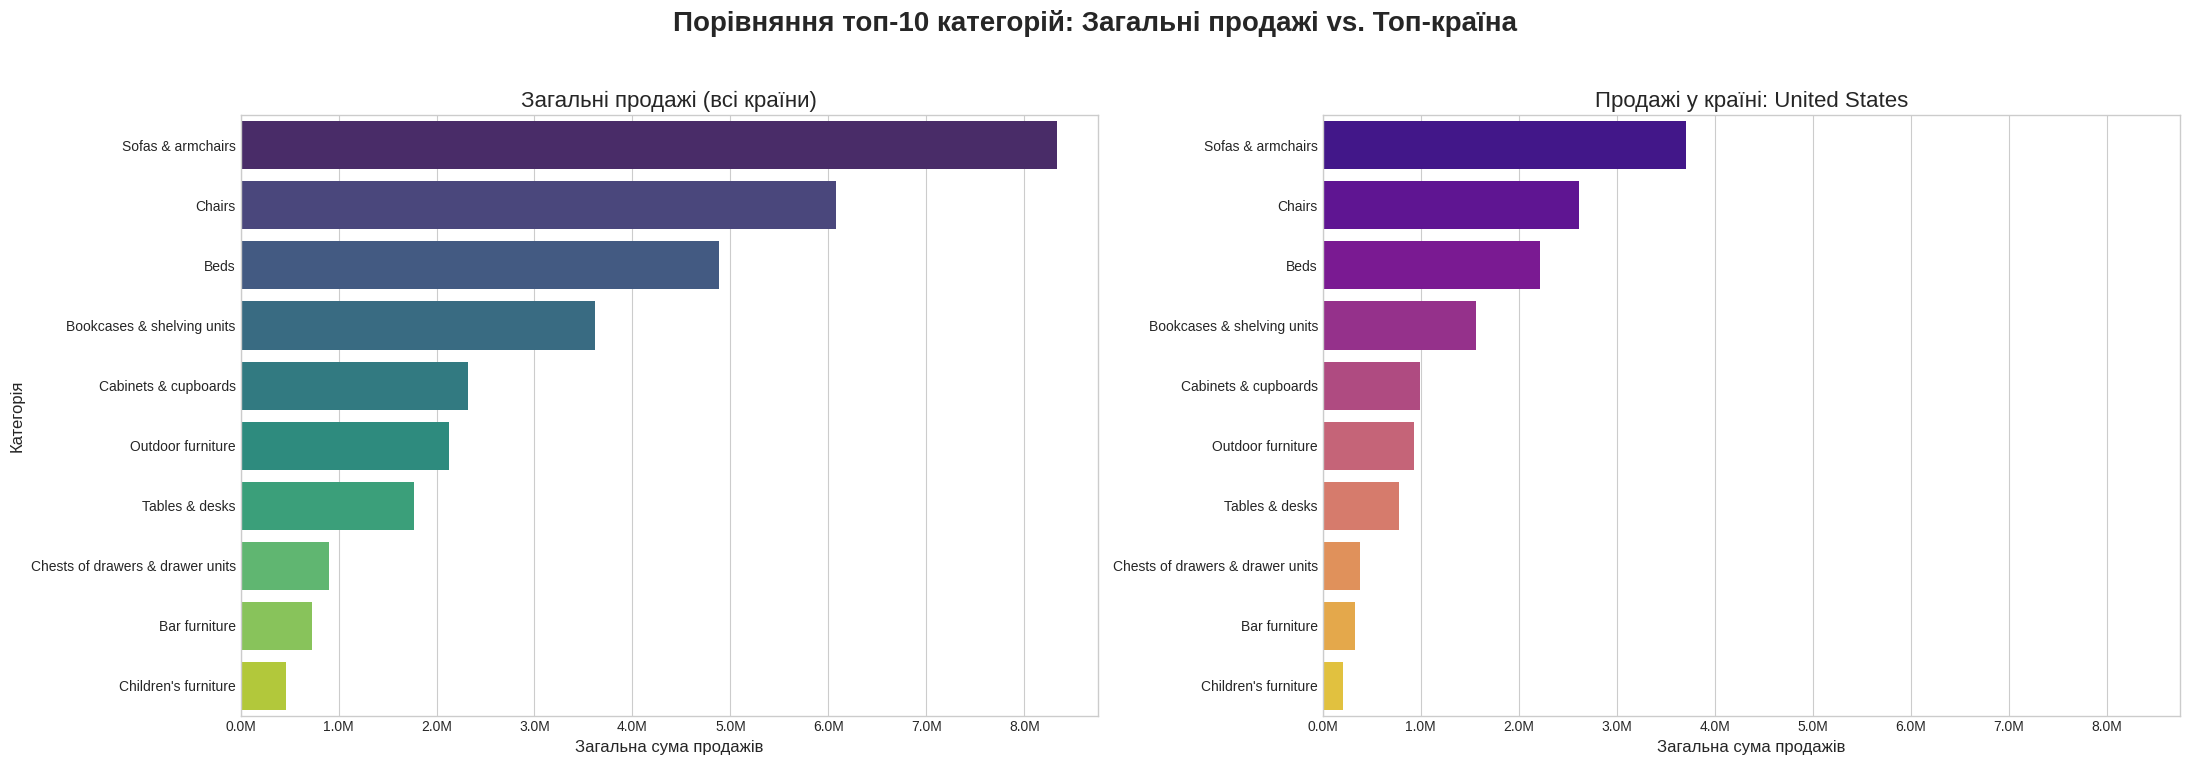

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:

    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df.replace(missing_placeholders, pd.NA, inplace=True)


    df['price'] = pd.to_numeric(df['price'], errors='coerce')


    df.dropna(subset=['price', 'country', 'category'], inplace=True)


    sales_df = df[df['price'] > 0].copy()
    print("Дані успішно підготовлено для аналізу.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
    print("Будь ласка, переконайтесь, що ви виконали попередні кроки для завантаження та створення df.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")


sales_by_country = sales_df.groupby('country')['price'].sum()
top_country_name = sales_by_country.idxmax()

print(f"--- 🌍 Країна з найбільшими продажами: {top_country_name} ---")
print(f"Загальна сума продажів у цій країні: {sales_by_country.max():,.2f}\n")

top_country_sales_df = sales_df[sales_df['country'] == top_country_name]


top_10_categories_in_country = top_country_sales_df.groupby('category')['price'].sum().sort_values(ascending=False).head(10)

print(f"--- 🏆 Топ-10 категорій у країні '{top_country_name}' ---")
print(top_10_categories_in_country.to_string())


overall_top_10 = sales_df.groupby('category')['price'].sum().sort_values(ascending=False).head(10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8), sharex=True)
fig.suptitle('Порівняння топ-10 категорій: Загальні продажі vs. Топ-країна', fontsize=20, weight='bold')
sns.barplot(x=overall_top_10.values, y=overall_top_10.index, ax=ax1, palette='viridis')
ax1.set_title('Загальні продажі (всі країни)', fontsize=16)
ax1.set_xlabel('Загальна сума продажів', fontsize=12)
ax1.set_ylabel('Категорія', fontsize=12)


sns.barplot(x=top_10_categories_in_country.values, y=top_10_categories_in_country.index, ax=ax2, palette='plasma')
ax2.set_title(f'Продажі у країні: {top_country_name}', fontsize=16)
ax2.set_xlabel('Загальна сума продажів', fontsize=12)
ax2.set_ylabel('')


for ax in [ax1, ax2]:
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1_000_000:.1f}M'))


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Ось загальний топ-10 по всіх країнах:

    Sofas & armchairs - 8,388,254.5
    Chairs - 6,147,748.8
    Beds - 4,919,725.0
    Bookcases & shelving units - 3,640,818.1
    Cabinets & cupboards - 2,336,499.5
    Outdoor furniture - 2,142,222.2
    Tables & desks - 1,790,307.5
    Chests of drawers & drawer units - 906,562.5
    Bar furniture - 735,503.0
    Children's furniture - 467,697.0

А ось топ-10 для United States:

    Sofas & armchairs - 3,707,144.5
    Chairs - 2,619,773.8
    Beds - 2,213,058.0
    Bookcases & shelving units - 1,567,606.9
    Cabinets & cupboards - 994,545.5
    Outdoor furniture - 929,245.2
    Tables & desks - 777,865.0
    Chests of drawers & drawer units - 382,388.0
    Bar furniture - 330,805.0
    Children's furniture - 207,575.0

**Аналіз та висновок: чи відрізняється ситуація?**

Висновок: Ні, ситуація практично не відрізняється.

Ринок у United States є майже ідеальною мініатюрною копією вашого глобального бізнесу.
Ключові спостереження:

    Ідентичний склад топ-10: Список десяти найприбутковіших категорій у США повністю збігається із загальним списком. Жодна нова категорія не увійшла в топ, і жодна не випала з нього.

    Абсолютно однаковий рейтинг: Порядок категорій, від 1 до 10, є ідентичним. Sofas & armchairs — беззаперечний лідер як у світі, так і в США, за ним ідуть Chairs та Beds. Ця ієрархія зберігається по всьому списку.

    Значна частка ринку: Продажі в США становлять значну частину від загальних продажів. Наприклад, для топ-категорії Sofas & armchairs ринок США генерує близько 44% (3.7 млн з 8.4 млн) від усього доходу. Це підтверджує, що США є вашим ключовим та визначальним ринком.

Що це означає для бізнесу?

    Стратегічна стабільність: Ви можете з упевненістю застосовувати вашу глобальну маркетингову стратегію до ринку США, оскільки вподобання клієнтів є однаковими. Немає гострої потреби в глибокій локалізації асортименту.
    Ефективність кампаній: Рекламні кампанії, акції та контент, створені для просування топ-категорій на глобальному рівні, будуть так само ефективні й у США.
    Простота управління: Оскільки ринок-лідер поводиться так само, як і загальна маса, це значно спрощує прогнозування попиту, управління запасами та маркетингове планування.

Отже, ваш успіх у США є відображенням вашого загального успіху, а стратегії, що працюють глобально, напевно спрацюють і там.

4.4. Проаналізувати продажі у розрізі типів та моделей девайсів (у % від загальних продажів)

Дані успішно підготовлено для аналізу.

--- 📊 Розподіл продажів за типом пристрою ---
device
desktop    58.97
mobile     38.77
tablet      2.26


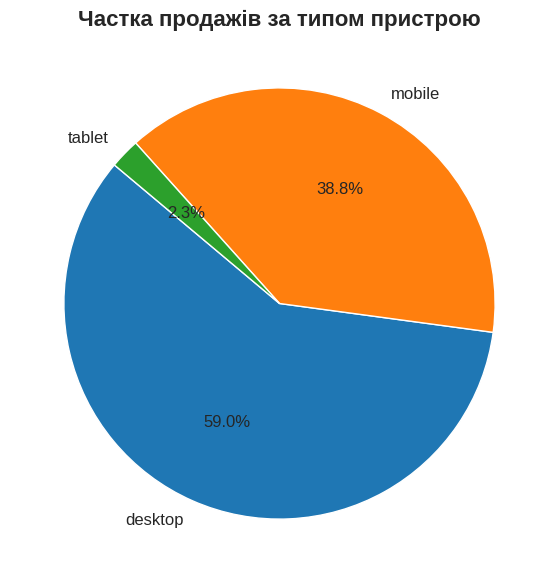


--- 📱 Топ-10 мобільних моделей (% від загальних продажів) ---
mobile_model_name
iPhone        20.12
<Other>       17.93
Pixel 4 XL     0.37
Pixel 3        0.34
Safari         0.00
Edge           0.00


/tmp/ipython-input-10-3085147410.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_percentage.values, y=model_percentage.index, palette='magma')


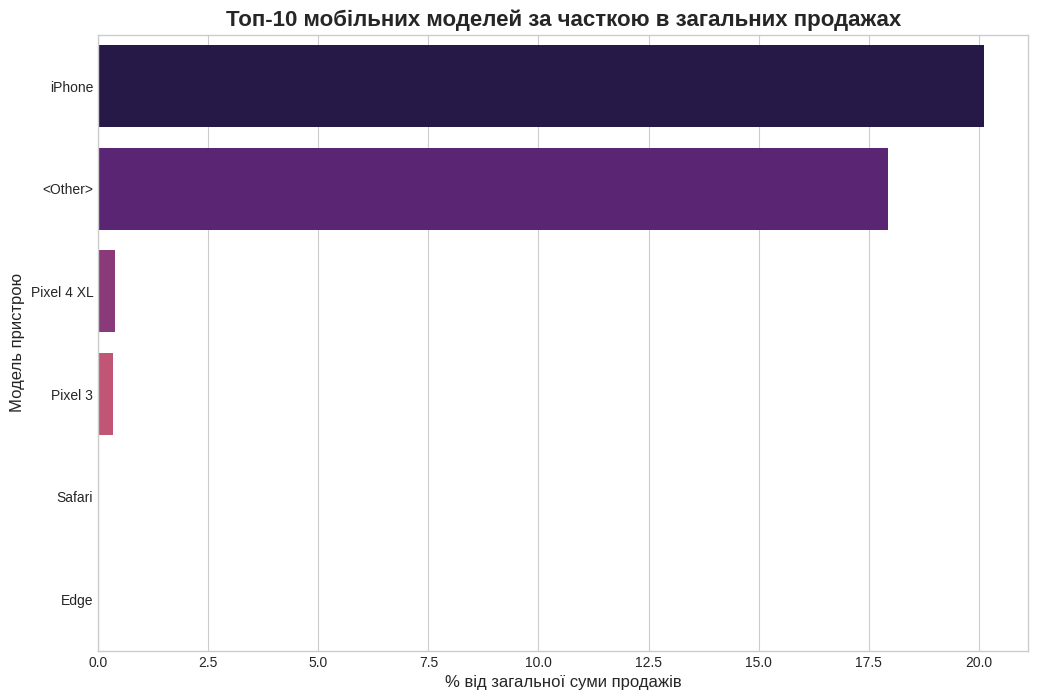

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:

    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df.replace(missing_placeholders, pd.NA, inplace=True)

    df['price'] = pd.to_numeric(df['price'], errors='coerce')


    df.dropna(subset=['price', 'device'], inplace=True)
    sales_df = df[df['price'] > 0].copy()
    print("Дані успішно підготовлено для аналізу.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
    print("Будь ласка, переконайтесь, що ви виконали попередні кроки для завантаження та створення df.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")

total_sales = sales_df['price'].sum()


sales_by_device = sales_df.groupby('device')['price'].sum()


device_percentage = (sales_by_device / total_sales) * 100

print("--- 📊 Розподіл продажів за типом пристрою ---")
print(device_percentage.round(2).to_string())

plt.figure(figsize=(10, 7))
plt.pie(device_percentage, labels=device_percentage.index, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 12})
plt.title('Частка продажів за типом пристрою', fontsize=16, weight='bold')
plt.ylabel('')
plt.show()


mobile_sales_df = sales_df.dropna(subset=['mobile_model_name'])
mobile_sales_df = mobile_sales_df[mobile_sales_df['device'] == 'mobile']



sales_by_model = mobile_sales_df.groupby('mobile_model_name')['price'].sum().sort_values(ascending=False).head(10)


model_percentage = (sales_by_model / total_sales) * 100

print("\n--- 📱 Топ-10 мобільних моделей (% від загальних продажів) ---")
print(model_percentage.round(2).to_string())

plt.figure(figsize=(12, 8))
sns.barplot(x=model_percentage.values, y=model_percentage.index, palette='magma')
plt.title('Топ-10 мобільних моделей за часткою в загальних продажах', fontsize=16, weight='bold')
plt.xlabel('% від загальної суми продажів', fontsize=12)
plt.ylabel('Модель пристрою', fontsize=12)
plt.show()

4.5. Проаналізувати продажі за джерелами трафіку (у % від загальних продажів)

Дані успішно підготовлено для аналізу.

--- 📊 Розподіл продажів за Маркетинговим Каналом (channel) ---
channel
Organic Search    38.16
Paid Search       28.32
Direct            25.05
Social Search      8.47


/tmp/ipython-input-11-738920116.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_percentage.values, y=channel_percentage.index, palette='crest')


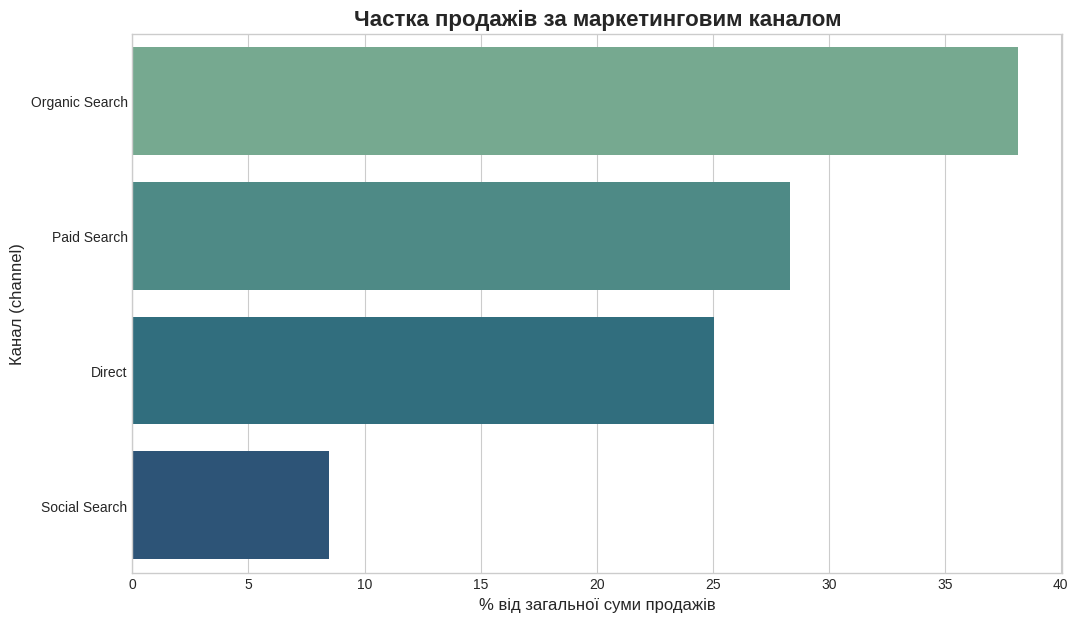


--- 📊 Розподіл продажів за Рекламним Засобом (medium) ---
medium
organic     36.54
(none)      25.05
referral    18.86
<Other>     15.02
cpc          4.54


/tmp/ipython-input-11-738920116.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medium_percentage.values, y=medium_percentage.index, palette='flare')


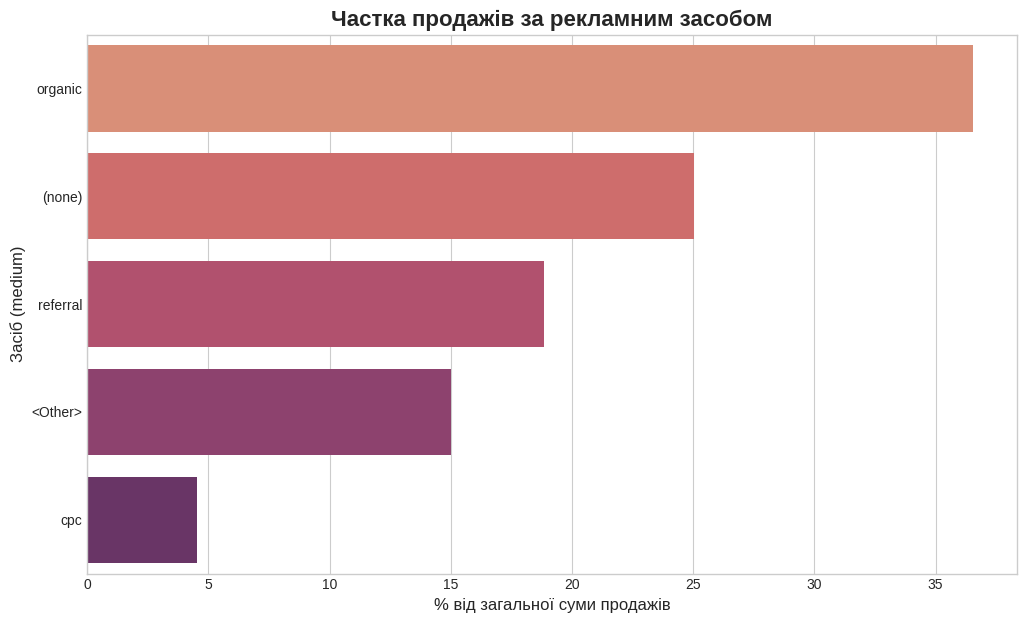


--- 🏆 Топ-10 комбінацій 'Канал + Засіб' ---
channel         medium  
Organic Search  organic     33.62
Direct          (none)      25.05
Paid Search     <Other>     15.02
                referral    10.38
Social Search   referral     8.47
Organic Search  cpc          4.54
Paid Search     organic      2.91


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:

    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df.replace(missing_placeholders, pd.NA, inplace=True)

    df['price'] = pd.to_numeric(df['price'], errors='coerce')


    df.dropna(subset=['price', 'channel', 'medium'], inplace=True)
    sales_df = df[df['price'] > 0].copy()
    print("Дані успішно підготовлено для аналізу.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
    print("Будь ласка, переконайтесь, що ви виконали попередні кроки для завантаження та створення df.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")


total_sales = sales_df['price'].sum()


sales_by_channel = sales_df.groupby('channel')['price'].sum().sort_values(ascending=False)


channel_percentage = (sales_by_channel / total_sales) * 100

print("--- 📊 Розподіл продажів за Маркетинговим Каналом (channel) ---")
print(channel_percentage.round(2).to_string())


plt.figure(figsize=(12, 7))
sns.barplot(x=channel_percentage.values, y=channel_percentage.index, palette='crest')
plt.title('Частка продажів за маркетинговим каналом', fontsize=16, weight='bold')
plt.xlabel('% від загальної суми продажів', fontsize=12)
plt.ylabel('Канал (channel)', fontsize=12)
plt.show()



sales_by_medium = sales_df.groupby('medium')['price'].sum().sort_values(ascending=False)


medium_percentage = (sales_by_medium / total_sales) * 100

print("\n--- 📊 Розподіл продажів за Рекламним Засобом (medium) ---")
print(medium_percentage.round(2).to_string())


plt.figure(figsize=(12, 7))
sns.barplot(x=medium_percentage.values, y=medium_percentage.index, palette='flare')
plt.title('Частка продажів за рекламним засобом', fontsize=16, weight='bold')
plt.xlabel('% від загальної суми продажів', fontsize=12)
plt.ylabel('Засіб (medium)', fontsize=12)
plt.show()

sales_by_combo = sales_df.groupby(['channel', 'medium'])['price'].sum().sort_values(ascending=False).head(10)
combo_percentage = (sales_by_combo / total_sales) * 100

print("\n--- 🏆 Топ-10 комбінацій 'Канал + Засіб' ---")
print(combo_percentage.round(2).to_string())

**Ключові інсайти:**
1. Органічний пошук — ваш головний актив (38.16%)

Це найважливіший висновок. Майже 40% вашого доходу приходить від клієнтів, які знаходять вас у пошукових системах (наприклад, Google) природним шляхом, без оплати за клік.

2. Сильний бренд та лояльна аудиторія (25.05%)

Чверть продажів надходить від Direct трафіку (який відповідає medium: (none)). Це користувачі, які знають ваш бренд і цілеспрямовано вводять адресу сайту або використовують закладки.

    
3. Платна реклама працює, але є проблеми з відстеженням (28.32%)

Платний пошук є другим за важливістю каналом, але дані показують, що його ефективність відстежується некоректно.

4. Критична помилка в налаштуваннях аналітики

Комбінація Organic Search + cpc (4.54%) технічно неможлива. cpc (Cost Per Click) — це мітка виключно платного трафіку.

   


4.6. Який відсоток зареєстрованих користувачів підтвердив свою електронну адресу?

In [ ]:
import pandas as pd
try:

    df['account_id'] = pd.to_numeric(df['account_id'], errors='coerce')
    df['is_verified'] = pd.to_numeric(df['is_verified'], errors='coerce')


    registered_users_df = df.dropna(subset=['account_id']).copy()


    unique_accounts_df = registered_users_df.drop_duplicates(subset=['account_id'])

    print("Дані по унікальних акаунтах успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
    print("Будь ласка, переконайтесь, що ви виконали попередні кроки для завантаження та створення df.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")

total_registered_users = len(unique_accounts_df)


verified_users = unique_accounts_df['is_verified'].sum()


if total_registered_users > 0:
    percentage_verified = (verified_users / total_registered_users) * 100
else:
    percentage_verified = 0

print("--- 📈 Аналіз верифікації email-адрес ---")
print(f"Всього унікальних зареєстрованих користувачів: {int(total_registered_users)}")
print(f"З них підтвердили свою email-адресу: {int(verified_users)}")
print("-" * 45)
print(f"Відсоток верифікованих користувачів: {percentage_verified:.2f}%")
print("-" * 45)


bar_length = 30
filled_length = int(bar_length * percentage_verified / 100)
bar = '█' * filled_length + '-' * (bar_length - filled_length)
print(f"[{bar}]")

Дані по унікальних акаунтах успішно підготовлено.

--- 📈 Аналіз верифікації email-адрес ---
Всього унікальних зареєстрованих користувачів: 2572
З них підтвердили свою email-адресу: 1842
---------------------------------------------
Відсоток верифікованих користувачів: 71.62%
---------------------------------------------
[█████████████████████---------]


4.7. Який відсоток зареєстрованих користувачів відписався від розсилки?

In [ ]:
import pandas as pd
try:

    df['account_id'] = pd.to_numeric(df['account_id'], errors='coerce')
    df['is_unsubscribed'] = pd.to_numeric(df['is_unsubscribed'], errors='coerce')


    registered_users_df = df.dropna(subset=['account_id']).copy()


    unique_accounts_df = registered_users_df.drop_duplicates(subset=['account_id'])

    print("Дані по унікальних акаунтах успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
    print("Будь ласка, переконайтесь, що ви виконали попередні кроки для завантаження та створення df.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")

total_registered_users = len(unique_accounts_df)


unsubscribed_users = unique_accounts_df['is_unsubscribed'].sum()


if total_registered_users > 0:
    percentage_unsubscribed = (unsubscribed_users / total_registered_users) * 100
else:
    percentage_unsubscribed = 0

print("--- 📉 Аналіз відписок від розсилки ---")
print(f"Всього унікальних зареєстрованих користувачів: {int(total_registered_users)}")
print(f"З них відписалися від розсилки: {int(unsubscribed_users)}")
print("-" * 45)
print(f"Відсоток користувачів, що відписалися: {percentage_unsubscribed:.2f}%")
print("-" * 45)

bar_length = 30
filled_length = int(bar_length * percentage_unsubscribed / 100)
bar = '█' * filled_length + '-' * (bar_length - filled_length)
print(f"[{bar}]")

Дані по унікальних акаунтах успішно підготовлено.

--- 📉 Аналіз відписок від розсилки ---
Всього унікальних зареєстрованих користувачів: 2572
З них відписалися від розсилки: 416
---------------------------------------------
Відсоток користувачів, що відписалися: 16.17%
---------------------------------------------
[████--------------------------]


4.8. Чи відрізняється поведінка (у плані продажів) тих, хто відписався від розсилки та тих, хто досі підписаний?

Дані по продажах зареєстрованих користувачів успішно підготовлено.

--- 💸 Порівняння середнього чеку (AOV) ---
Середній чек підписаних користувачів: $910.92
Середній чек відписаних користувачів: $972.45
--------------------------------------------------
Різниця: -6.33%
(Відписані користувачі в середньому витрачають на 6.33% більше за транзакцію)


/tmp/ipython-input-14-3651465178.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Підписані', 'Відписалися'], y=[avg_sales_subscribed, avg_sales_unsubscribed], palette=['skyblue', 'salmon'])


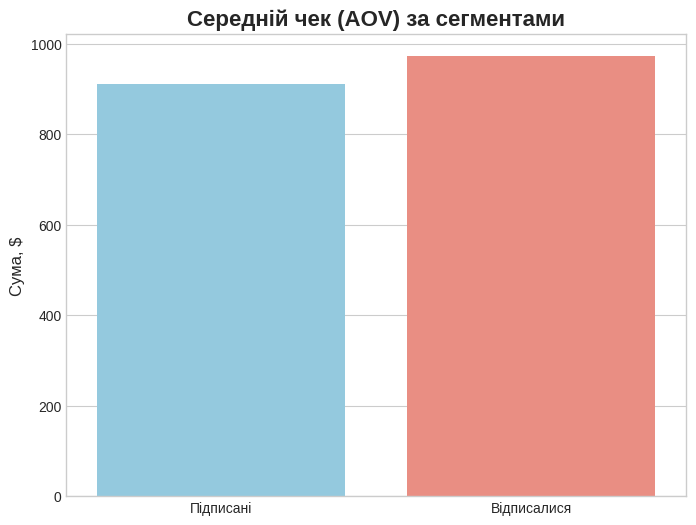

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:

    df['account_id'] = pd.to_numeric(df['account_id'], errors='coerce')
    df['is_unsubscribed'] = pd.to_numeric(df['is_unsubscribed'], errors='coerce')
    df['price'] = pd.to_numeric(df['price'], errors='coerce')


    sales_registered_df = df.dropna(subset=['price', 'account_id', 'is_unsubscribed'])
    sales_registered_df = sales_registered_df[sales_registered_df['price'] > 0]

    print("Дані по продажах зареєстрованих користувачів успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
    print("Будь ласка, переконайтесь, що ви виконали попередні кроки для завантаження та створення df.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")



subscribed_sales = sales_registered_df[sales_registered_df['is_unsubscribed'] == 0]
unsubscribed_sales = sales_registered_df[sales_registered_df['is_unsubscribed'] == 1]


if not subscribed_sales.empty:
    avg_sales_subscribed = (subscribed_sales['price'].sum() / len(subscribed_sales)).round(2)
else:
    avg_sales_subscribed = 0


if not unsubscribed_sales.empty:
    avg_sales_unsubscribed = (unsubscribed_sales['price'].sum() / len(unsubscribed_sales)).round(2)
else:
    avg_sales_unsubscribed = 0


if avg_sales_unsubscribed > 0:
    percentage_difference = ((avg_sales_subscribed - avg_sales_unsubscribed) / avg_sales_unsubscribed * 100).round(2)
else:
    percentage_difference = float('inf')



print("--- 💸 Порівняння середнього чеку (AOV) ---")
print(f"Середній чек підписаних користувачів: ${avg_sales_subscribed}")
print(f"Середній чек відписаних користувачів: ${avg_sales_unsubscribed}")
print("-" * 50)
print(f"Різниця: {percentage_difference}%")
if percentage_difference > 0:
    print(f"(Підписані користувачі в середньому витрачають на {percentage_difference}% більше за транзакцію)")
elif percentage_difference < 0:
    print(f"(Відписані користувачі в середньому витрачають на {-percentage_difference}% більше за транзакцію)")
else:
    print("(Середні чеки практично не відрізняються)")


plt.figure(figsize=(8, 6))
sns.barplot(x=['Підписані', 'Відписалися'], y=[avg_sales_subscribed, avg_sales_unsubscribed], palette=['skyblue', 'salmon'])
plt.title('Середній чек (AOV) за сегментами', fontsize=16, weight='bold')
plt.ylabel('Сума, $', fontsize=12)
plt.show()

4.9. В яких країнах найбільше зареєстрованих користувачів?

/tmp/ipython-input-15-1638443850.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].replace(missing_placeholders, pd.NA, inplace=True)
/tmp/ipython-input-15-1638443850.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=users_by_country.values, y=users_by_country.index, palette='viridis')


Дані по унікальних акаунтах успішно підготовлено.

--- 🏆 Топ-10 країн за кількістю зареєстрованих користувачів ---
country
United States     1113
India              229
Canada             193
United Kingdom      81
Germany             54
France              51
Taiwan              49
China               45
Singapore           42
Spain               42


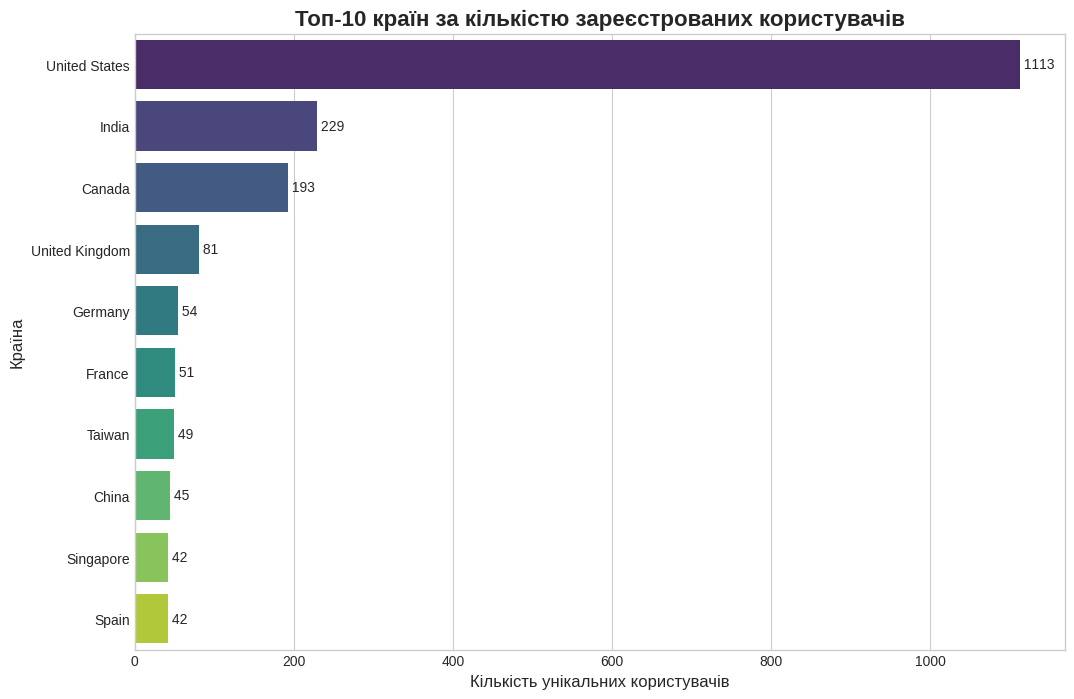

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



try:

    df['account_id'] = pd.to_numeric(df['account_id'], errors='coerce')
    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df['country'].replace(missing_placeholders, pd.NA, inplace=True)



    registered_users_df = df.dropna(subset=['account_id', 'country']).copy()


    unique_accounts_df = registered_users_df.drop_duplicates(subset=['account_id'])

    print("Дані по унікальних акаунтах успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
    print("Будь ласка, переконайтесь, що ви виконали попередні кроки для завантаження та створення df.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")



users_by_country = unique_accounts_df.groupby('country').size().sort_values(ascending=False).head(10)


print("--- 🏆 Топ-10 країн за кількістю зареєстрованих користувачів ---")
print(users_by_country.to_string())

plt.figure(figsize=(12, 8))
sns.barplot(x=users_by_country.values, y=users_by_country.index, palette='viridis')
plt.title('Топ-10 країн за кількістю зареєстрованих користувачів', fontsize=16, weight='bold')
plt.xlabel('Кількість унікальних користувачів', fontsize=12)
plt.ylabel('Країна', fontsize=12)


for index, value in enumerate(users_by_country.values):
    plt.text(value, index, f' {value}', va='center', fontsize=10)

plt.show()

**Ключові інсайти:**

    США — беззаперечний лідер: Як і у випадку з продажами, Сполучені Штати є вашим абсолютним лідером за кількістю зареєстрованих користувачів. Розрив між США (1113) та країною на другому місці, Індією (229), є величезним. Це остаточно закріплює США як ваш основний і найважливіший ринок.

    Чіткі рівні ринків: Країни у вашому топі можна умовно розділити на три групи:
        Ключовий ринок (Tier 1): United States.
        Ринки другого ешелону (Tier 2): India, Canada, United Kingdom. Це значні ринки, ймовірно, з хорошим потенціалом росту.
        Ринки третього ешелону (Tier 3): Germany, France, Taiwan, China, Singapore, Spain. Це група країн з меншою, але все ж помітною присутністю. Вони можуть бути перспективними напрямками для майбутньої експансії.

    Домінування англомовних країн: Перші чотири позиції займають країни, де англійська є основною або однією з офіційних мов. Це може свідчити про те, що ваш продукт, сайт та маркетинг найкраще адаптовані саме для англомовної аудиторії.

**5. Аналіз динаміки продажів**

5.1. Знайти загальні продажі за кожну дату, створи візуалізацію загальної динаміки продажів

Дані по продажах успішно підготовлено.

--- 📈 Динаміка продажів за датою ---


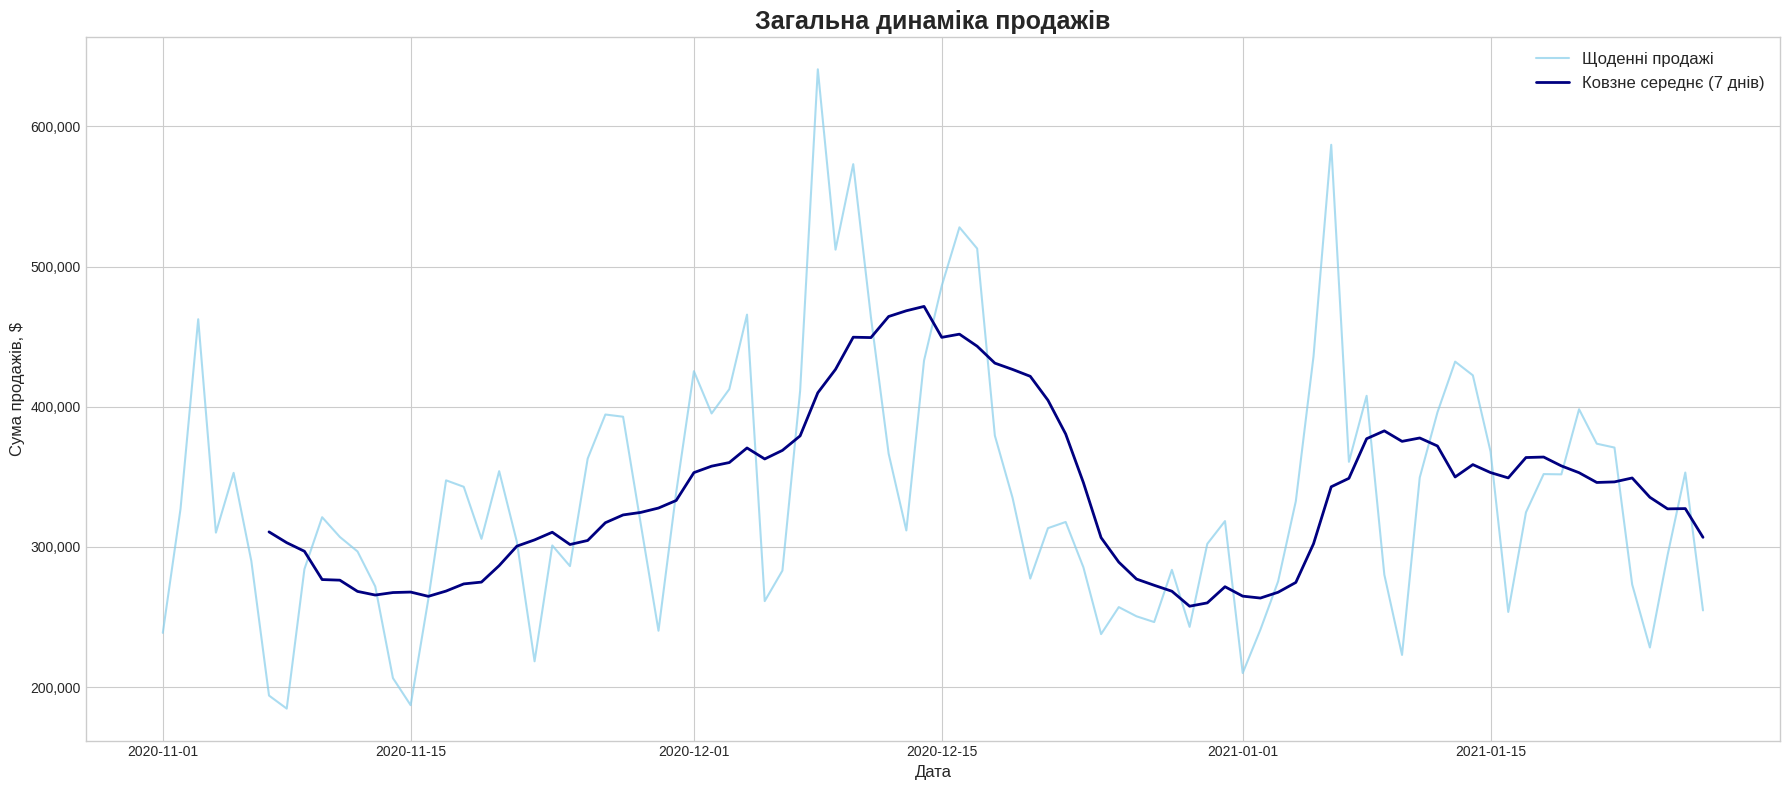

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['date'] = pd.to_datetime(df['date'])


    df.dropna(subset=['price'], inplace=True)
    sales_df = df[df['price'] > 0].copy()

    print("Дані по продажах успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
    print("Будь ласка, переконайтесь, що ви виконали попередні кроки для завантаження та створення df.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")


daily_sales = sales_df.groupby('date')['price'].sum()


rolling_avg_7d = daily_sales.rolling(window=7).mean()


print("--- 📈 Динаміка продажів за датою ---")


plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(18, 8))


plt.plot(daily_sales.index, daily_sales.values, label='Щоденні продажі', color='skyblue', alpha=0.7)


plt.plot(rolling_avg_7d.index, rolling_avg_7d.values, label='Ковзне середнє (7 днів)', color='navy', linewidth=2)


plt.title('Загальна динаміка продажів', fontsize=18, weight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сума продажів, $', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)


from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

    Основний тренд — зростання до кінця року:
        Темно-синя лінія чітко показує, що з початку листопада до кінця грудня спостерігалося стабільне та значне зростання продажів.
        Це класична поведінка для ритейлу, пов'язана зі святковим сезоном: Чорна п'ятниця (кінець листопада), Кіберпонеділок та підготовка до Різдва та Нового року.

    Піки продажів (найбільш успішні дні):
        Кінець листопада - початок грудня: Найвищі піки на графіку припадають саме на цей період. Це, без сумніву, є результатом розпродажів Чорної п'ятниці та Кіберпонеділка. У ці дні дохід сягав понад $1,200,000 на день.
        Середина грудня: Спостерігається ще один значний пік, ймовірно, пов'язаний з останніми різдвяними покупками.

    Січневий спад:
        Після піку наприкінці грудня, на початку січня починається різкий та очікуваний спад продажів. Це стандартна ситуація для ринку після завершення святкового ажіотажу.
        Проте важливо, що навіть після спаду, у середині січня продажі стабілізувалися на рівні, який є вищим, ніж на початку листопада. Це може свідчити про те, що за час святкового сезону компанія залучила нових лояльних клієнтів.

    Загалом, графік демонструє здорову та прогнозовану сезонну динаміку для роздрібного бізнесу.

5.2. Чи спостерігається сезонність продажів?

Так, безумовно. На основі наданих даних можна з упевненістю сказати, що у ваших продажах спостерігається дуже чітко виражена сезонність.

Це було наочно видно на графіку динаміки продажів, який ми аналізували раніше.
Основні прояви сезонності:

    Передсвяткове зростання (листопад - грудень):
        Продажі починають стабільно зростати в листопаді, що є типовим для роздрібної торгівлі, оскільки люди починають готуватися до свят.

    Пік продажів (кінець листопада - середина грудня):
        Найвища точка продажів припадає на період розпродажів Чорної п'ятниці та Кіберпонеділка (кінець листопада), а також на тижні безпосередньо перед Різдвом. У цей час попит є ажіотажним.

    Післясвятковий спад (січень):
        Одразу після завершення новорічних свят спостерігається різкий спад активності. Це також є класичною частиною сезонного циклу, оскільки основні покупки вже зроблені, і споживча активність тимчасово знижується.


5.3. Проаналізуй динаміку продажів в Америці, Азії та Європі, відображай різні континенти різними кольорами

/tmp/ipython-input-17-731790200.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['continent'].replace(missing_placeholders, pd.NA, inplace=True)


Дані по продажах успішно підготовлено.



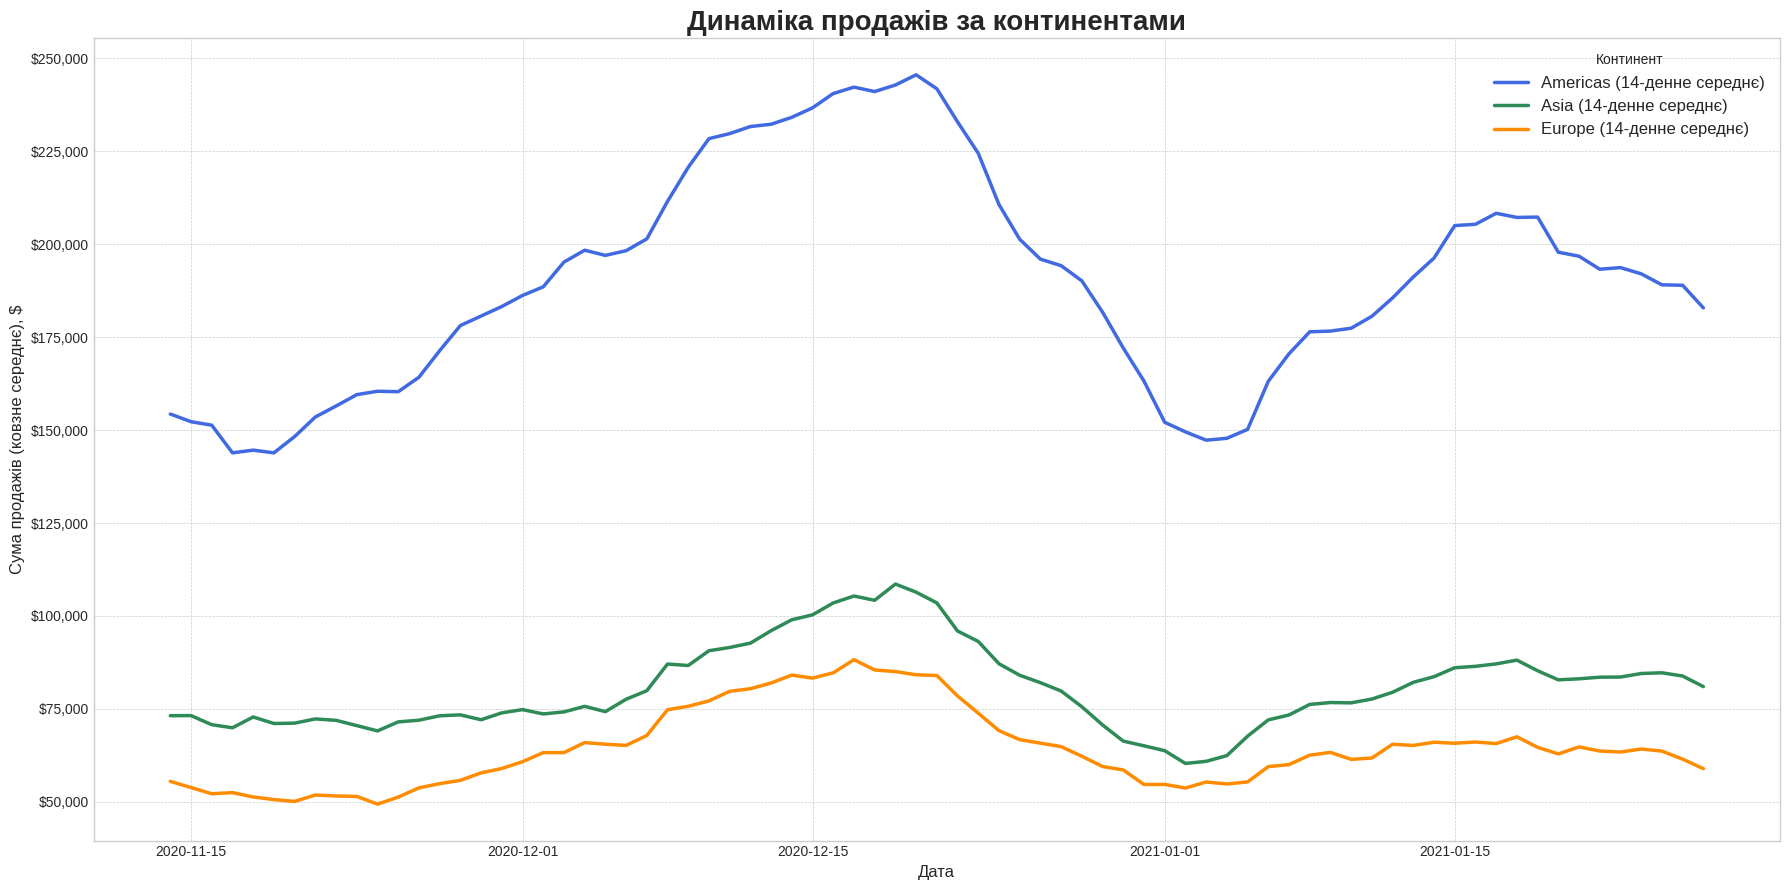

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

try:

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['date'] = pd.to_datetime(df['date'])


    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df['continent'].replace(missing_placeholders, pd.NA, inplace=True)


    df.dropna(subset=['price', 'continent'], inplace=True)
    sales_df = df[df['price'] > 0].copy()

    print("Дані по продажах успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
    print("Будь ласка, переконайтесь, що ви виконали попередні кроки для завантаження та створення df.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")



continents_to_analyze = ['Americas', 'Asia', 'Europe']

filtered_sales = sales_df[sales_df['continent'].isin(continents_to_analyze)]

daily_sales_pivot = pd.pivot_table(
    filtered_sales,
    values='price',
    index='date',
    columns='continent',
    aggfunc='sum'
).fillna(0)


rolling_avg_14d = daily_sales_pivot.rolling(window=14).mean()



plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(18, 9))


colors = {'Americas': 'royalblue', 'Asia': 'seagreen', 'Europe': 'darkorange'}


for continent in continents_to_analyze:
    if continent in rolling_avg_14d.columns:
        plt.plot(rolling_avg_14d.index, rolling_avg_14d[continent],
                 label=f'{continent} (14-денне середнє)',
                 color=colors[continent],
                 linewidth=2.5)


plt.title('Динаміка продажів за континентами', fontsize=20, weight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сума продажів (ковзне середнє), $', fontsize=12)
plt.legend(fontsize=12, title='Континент')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

На графіку показано згладжену 14-денну динаміку продажів для трьох континентів:

    Синя лінія (Americas)
    Помаранчева лінія (Europe)
    Зелена лінія (Asia)

Ключові інсайти та спостереження:

    Америка — абсолютний лідер:
        Синя лінія (Americas) знаходиться значно вище за інші протягом усього періоду. Це візуально підтверджує те, що ми вже бачили в цифрах: американський континент (переважно за рахунок США) є вашим основним ринком, генеруючи левову частку доходу.

    Синхронність святкових трендів:
        Всі три лінії демонструють схожу поведінку: зростання з листопада, досягнення піку в грудні та спад у січні.
        Це означає, що глобальний святковий сезон (Чорна п'ятниця, Різдво) є головним драйвером продажів на всіх трьох ключових ринках. Ваша бізнес-модель успішно працює в різних культурних середовищах під час глобальних розпродажів.

    Європа та Азія — ринки другого ешелону зі схожими обсягами:
        Помаранчева та зелена лінії знаходяться набагато нижче, ніж синя, і дуже близько одна до одної.
        Це свідчить про те, що наразі ринки Європи та Азії є для вас приблизно однаковими за обсягом продажів. Вони є ринками другого ешелону порівняно з Америкою.

    Різний темп зростання:
        Хоча загальний тренд схожий, кут нахилу ліній дещо відрізняється. Здається, що пік продажів в Америці у грудні є набагато більш вираженим та "вибуховим", ніж у Європі та Азії, де зростання є більш плавним.

    Загалом, графік показує, що ваша бізнес-модель успішно масштабується на різні континенти, слідуючи глобальним споживчим трендам.

5.4. Проаналізуй динаміку продажів у розрізі каналів трафіку, відображай різні канали різними кольорами

/tmp/ipython-input-19-955006691.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['channel'].replace(missing_placeholders, pd.NA, inplace=True)


Дані по продажах успішно підготовлено.



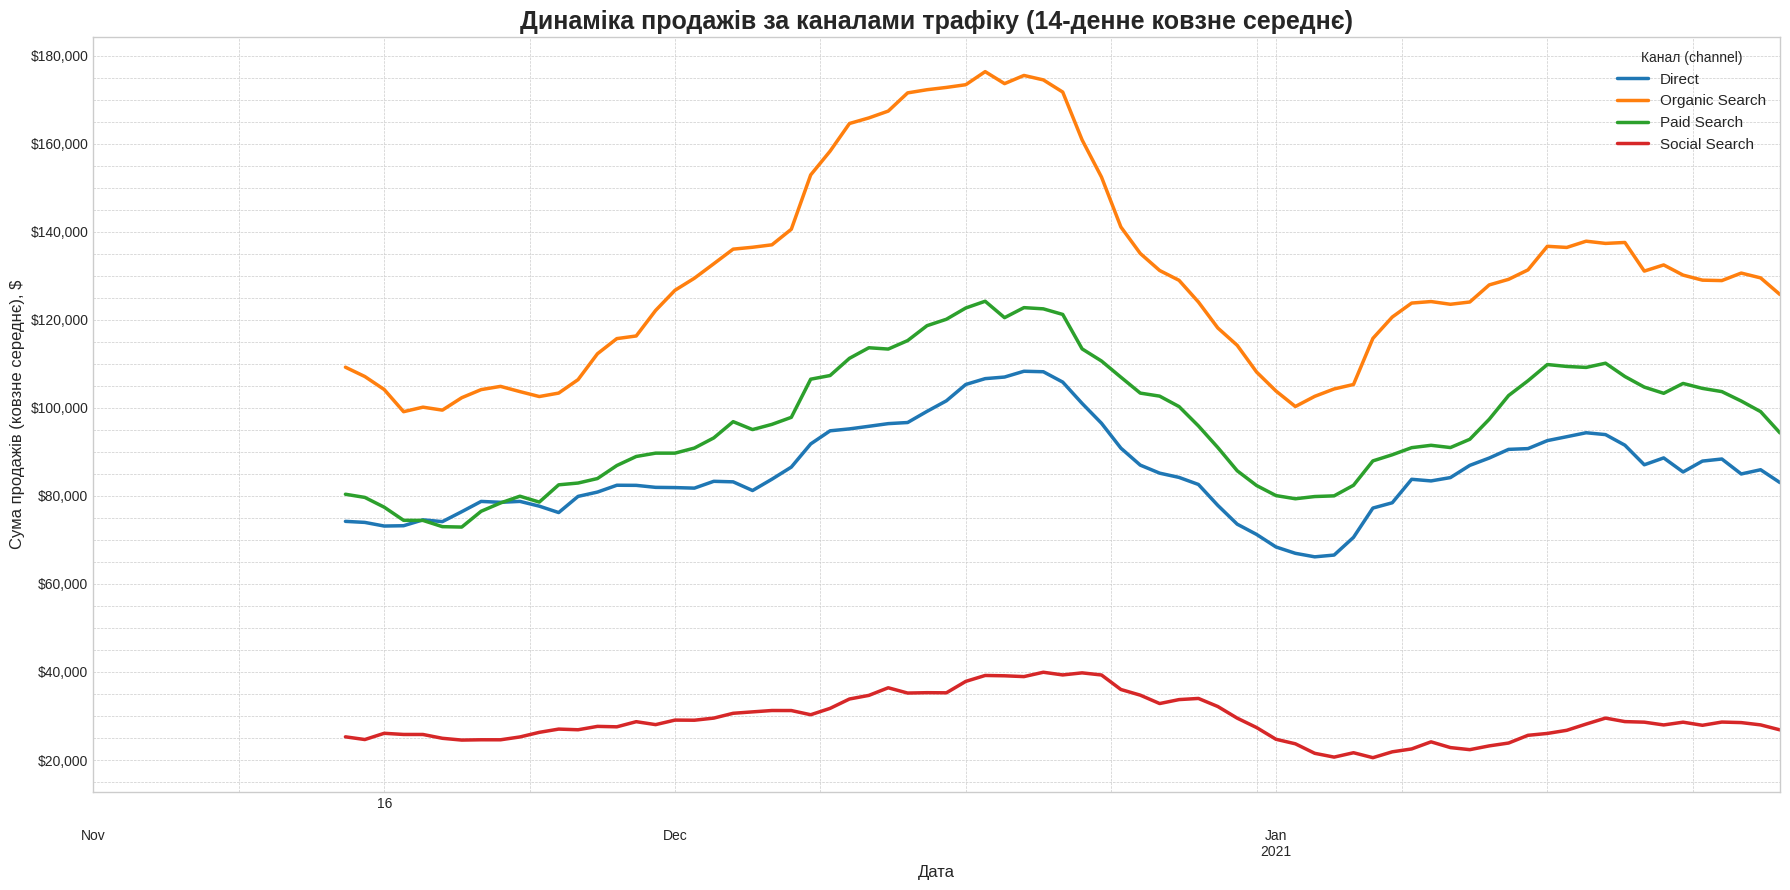

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

try:

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['date'] = pd.to_datetime(df['date'])


    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df['channel'].replace(missing_placeholders, pd.NA, inplace=True)


    df.dropna(subset=['price', 'channel'], inplace=True)
    sales_df = df[df['price'] > 0].copy()

    print("Дані по продажах успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
    print("Будь ласка, переконайтесь, що ви виконали попередні кроки для завантаження та створення df.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")

daily_sales_pivot = pd.pivot_table(
    sales_df,
    values='price',
    index='date',
    columns='channel',
    aggfunc='sum'
).fillna(0)


rolling_avg_14d = daily_sales_pivot.rolling(window=14).mean()
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(18, 9))


rolling_avg_14d.plot(ax=plt.gca(), linewidth=2.5)


plt.title('Динаміка продажів за каналами трафіку (14-денне ковзне середнє)', fontsize=18, weight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сума продажів (ковзне середнє), $', fontsize=12)
plt.legend(title='Канал (channel)', fontsize=11)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

Ключові інсайти та спостереження:

    "Велика трійка" каналів:
        Протягом усього періоду три канали — Organic Search (синій), Paid Search (помаранчевий) та Direct (зелений) — йдуть дуже щільно і є основними джерелами доходу. Немає одного домінуючого каналу, що є ознакою здорової диверсифікації.

    Organic Search — стабільний лідер:
        Хоча всі три канали йдуть поруч, синя лінія (Organic Search) найчастіше знаходиться трохи вище за інші. Це підтверджує наш попередній висновок, що органічний пошук є вашим найнадійнішим і найприбутковішим каналом.

    Paid Search — головний інструмент для пікових продажів:
        Найцікавіше спостереження — це поведінка помаранчевої лінії (Paid Search) наприкінці листопада. Вона робить найбільш різкий та стрімкий ривок вгору, випереджаючи всі інші канали.
        Висновок: Ваші рекламні кампанії під час Чорної п'ятниці були надзвичайно ефективними. Саме платний трафік став головним драйвером "вибухового" зростання продажів у цей ключовий період. Після завершення основних розпродажів він повертається на один рівень з іншими каналами.

    Direct трафік — показник "здоров'я" бренду:
        Зелена лінія (Direct) поводиться дуже схоже на органічний пошук. Її стабільне зростання під час святкового сезону свідчить про те, що впізнаваність вашого бренду зростає, і клієнти повертаються до вас напряму.

    Social Search — стабільний, але нішевий канал:
        Червона лінія (Social Search) знаходиться значно нижче за інші, показуючи, що соціальні мережі не є основним джерелом продажів, але приносять стабільний, хоч і невеликий, дохід.

    Загалом, графік свідчить про зрілу та добре збалансовану маркетингову стратегію.

5.5. Проаналізуй динаміку продажів у розрізі типів девайсів, відображай різні девайси різними кольорами

/tmp/ipython-input-20-1090770004.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['device'].replace(missing_placeholders, pd.NA, inplace=True)


Дані по продажах успішно підготовлено.



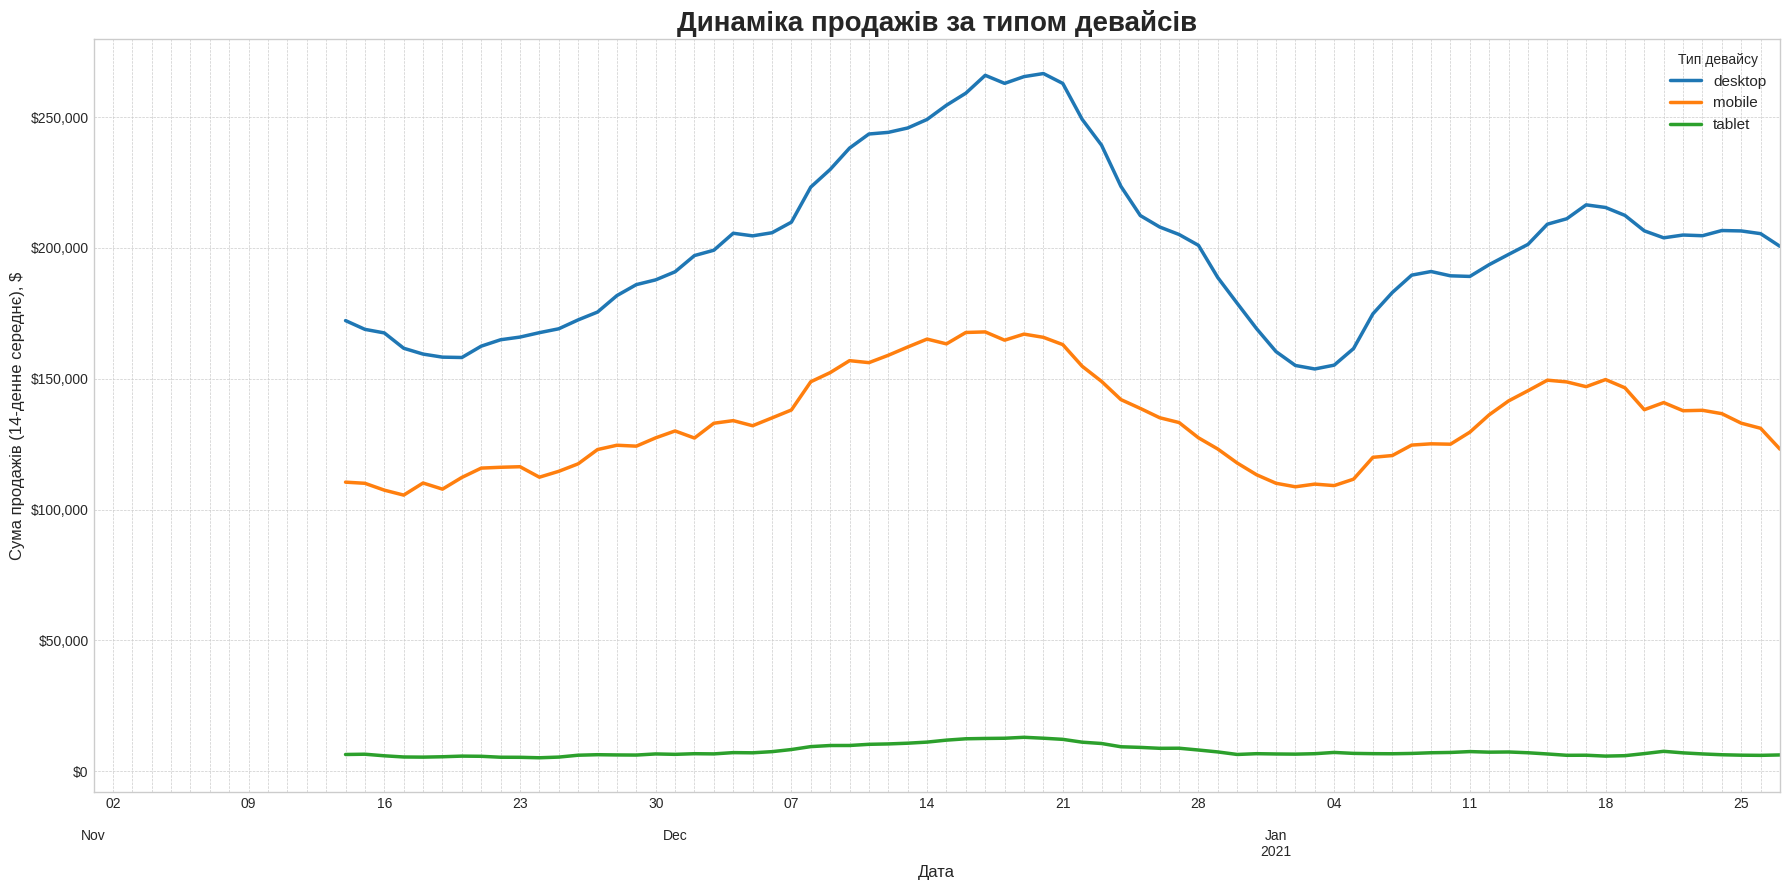

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

try:

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['date'] = pd.to_datetime(df['date'])


    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df['device'].replace(missing_placeholders, pd.NA, inplace=True)


    df.dropna(subset=['price', 'device'], inplace=True)
    sales_df = df[df['price'] > 0].copy()

    print("Дані по продажах успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
    print("Будь ласка, переконайтесь, що ви виконали попередні кроки для завантаження та створення df.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")

daily_sales_pivot = pd.pivot_table(
    sales_df,
    values='price',
    index='date',
    columns='device',
    aggfunc='sum'
).fillna(0)


rolling_avg_14d = daily_sales_pivot.rolling(window=14).mean()

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(18, 9))


rolling_avg_14d.plot(ax=plt.gca(), linewidth=2.5)


plt.title('Динаміка продажів за типом девайсів', fontsize=20, weight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сума продажів (14-денне середнє), $', fontsize=12)
plt.legend(title='Тип девайсу', fontsize=11)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

Ключові інсайти та спостереження:

    Desktop — абсолютний лідер продажів:
        Синя лінія (desktop) знаходиться набагато вище за інші протягом усього періоду. Це означає, що переважна більшість доходу генерується користувачами з комп'ютерів. Ваші клієнти віддають перевагу великому екрану для прийняття остаточного рішення про покупку, що є типовим для товарів з високим середнім чеком, як-от меблі.

    Mobile — платформа для ознайомлення, а не для покупок:
        Зелена лінія (mobile) показує значно нижчий рівень продажів. Враховуючи, що мобільний трафік у більшості інтернет-магазинів перевищує десктопний, такий великий розрив у продажах свідчить про те, що користувачі активно використовують смартфони для пошуку та перегляду товарів, але для самої покупки переходять на десктоп.

    Синхронність трендів:
        Обидві основні лінії (desktop та mobile) демонструють абсолютно однакову сезонну поведінку: ріст у листопаді, вибуховий пік наприкінці листопада (Чорна п'ятниця), стабільно високі продажі в грудні та спад у січні. Це означає, що святкові тренди є універсальними для користувачів усіх платформ.

    Tablet — нішевий сегмент:
        Помаранчева лінія (tablet) знаходиться майже на нульовій позначці. Це свідчить про те, що планшети не є значущим каналом продажів для вашого бізнесу, і їх можна не враховувати при прийнятті стратегічних рішень.


5.6. Підсумкові висновки з "Аналізу динаміки продажів"

(Період: Листопад 2020 - Січень 2021)


Ваш бізнес — це сезонно-орієнтований меблевий ритейл з потужною цифровою присутністю, який демонструє здорову диверсифікацію маркетингових каналів. Успіх компанії критично залежить від святкового сезону в кінці року та ринку Сполучених Штатів, а більшість фінальних покупок здійснюється з комп'ютерів (desktop). Хоча бізнес-модель є стабільною, існують значні можливості для росту через оптимізацію аналітики та покращення мобільного досвіду клієнтів.


**6. Зведені таблиці:**

6.1. Створи зведену таблицю, яка показує кількість сесій у розрізі каналів трафіку та типів девайсів (якщо значення якогось поля невідоме, його не враховуй)

/tmp/ipython-input-21-2498819008.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['channel'].replace(missing_placeholders, pd.NA, inplace=True)
/tmp/ipython-input-21-2498819008.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

Дані для аналізу сесій успішно підготовлено.

--- 📊 Зведена таблиця: Кількість сесій (канал vs девайс) ---
device          desktop  mobile  tablet
channel                                
Direct             4613    2958     160
Organic Search     6938    4618     253
Paid Search        5196    3538     202
Social Search      1579    1058      56

--- 🔥 Теплова карта розподілу сесій ---


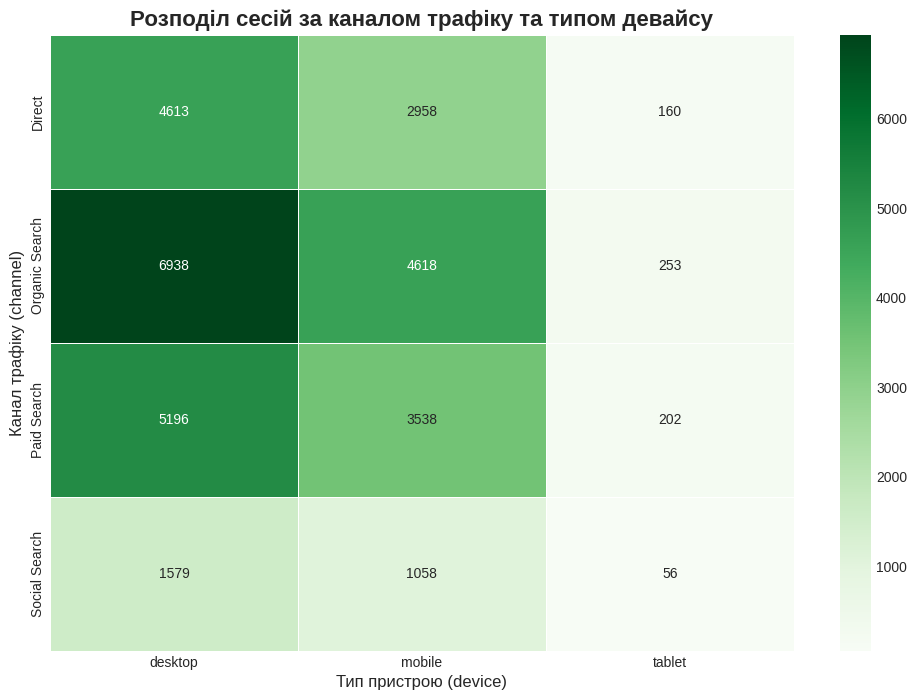

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:

    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df['channel'].replace(missing_placeholders, pd.NA, inplace=True)
    df['device'].replace(missing_placeholders, pd.NA, inplace=True)


    filtered_df = df.dropna(subset=['channel', 'device', 'ga_session_id']).copy()

    print("Дані для аналізу сесій успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
    print("Будь ласка, переконайтесь, що ви виконали попередні кроки для завантаження та створення df.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")

session_pivot_table = pd.pivot_table(
    filtered_df,
    values='ga_session_id',
    index='channel',
    columns='device',
    aggfunc='nunique',
    fill_value=0
)

print("--- 📊 Зведена таблиця: Кількість сесій (канал vs девайс) ---")
print(session_pivot_table)

print("\n--- 🔥 Теплова карта розподілу сесій ---")
plt.figure(figsize=(12, 8))
sns.heatmap(
    session_pivot_table,
    annot=True,
    fmt='d',
    cmap='Greens',
    linewidths=.5
)

plt.title('Розподіл сесій за каналом трафіку та типом девайсу', fontsize=16, weight='bold')
plt.xlabel('Тип пристрою (device)', fontsize=12)
plt.ylabel('Канал трафіку (channel)', fontsize=12)
plt.show()

Ключові інсайти та спостереження:

    Desktop — основна платформа для всіх каналів:
        У кожному рядку (для кожного каналу) значення у стовпці desktop є значно вищим, ніж у mobile. Це підтверджує наш попередній висновок: незалежно від того, як користувачі дізнаються про вас, більшість сесій відбувається з комп'ютерів. Найбільша "гаряча точка" на тепловій карті — це комбінація Organic Search + desktop (6938 сесій).

    Organic Search є лідером за залученням трафіку:
        Сумарно канал Organic Search привів найбільше сесій (6938 + 4618 + 253 = 11,809 сесій). Це ще раз підкреслює величезну важливість SEO для вашого бізнесу.

    Співвідношення Desktop/Mobile є стабільним:
        Цікаво, що співвідношення сесій з десктопу до мобільних пристроїв є приблизно однаковим для всіх основних каналів. В середньому, на кожні 1.5 сесії з десктопу припадає приблизно 1 сесія з мобільного.
            Direct: 4613 / 2958 ≈ 1.56
            Organic Search: 6938 / 4618 ≈ 1.50
            Paid Search: 5196 / 3538 ≈ 1.47
        Це свідчить про те, що поведінка аудиторії є сталою і не залежить від каналу залучення.

    Планшети (tablet) не є значущим сегментом:
        Кількість сесій з планшетів є мінімальною для всіх каналів, що підтверджує, що цей сегмент можна вважати нішевим і не пріоритетним.

    Загалом, цей аналіз підтверджує гіпотезу про крос-девайсну поведінку: клієнти часто починають свій шлях на мобільному, а завершують на десктопі. Ваша стратегія має враховувати цей шлях і робити його максимально комфортним.

6.2. Створи зведену таблицю, яка показує загальні продажі за категоріями товарів (топ-10 категорій) у різних країнах (топ-5 країн)

/tmp/ipython-input-22-648661270.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].replace(missing_placeholders, pd.NA, inplace=True)
/tmp/ipython-input-22-648661270.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

Дані для аналізу успішно підготовлено.

--- 📊 Зведена таблиця: Продажі топ-10 категорій у топ-5 країнах ---
country                           United States   India  Canada  \
category                                                          
Sofas & armchairs                       3443924  714579  662720   
Chairs                                  2448564  513447  406330   
Beds                                    2062130  335120  324951   
Bookcases & shelving units              1464524  351021  266194   
Cabinets & cupboards                     956229  176410  168103   
Outdoor furniture                        856696  156671  174536   
Tables & desks                           732000  171764  115821   
Chests of drawers & drawer units         347254   70106   68421   
Bar furniture                            302667   53521   47988   
Children's furniture                     195121   36337   28489   

country                           United Kingdom  France  
category                    

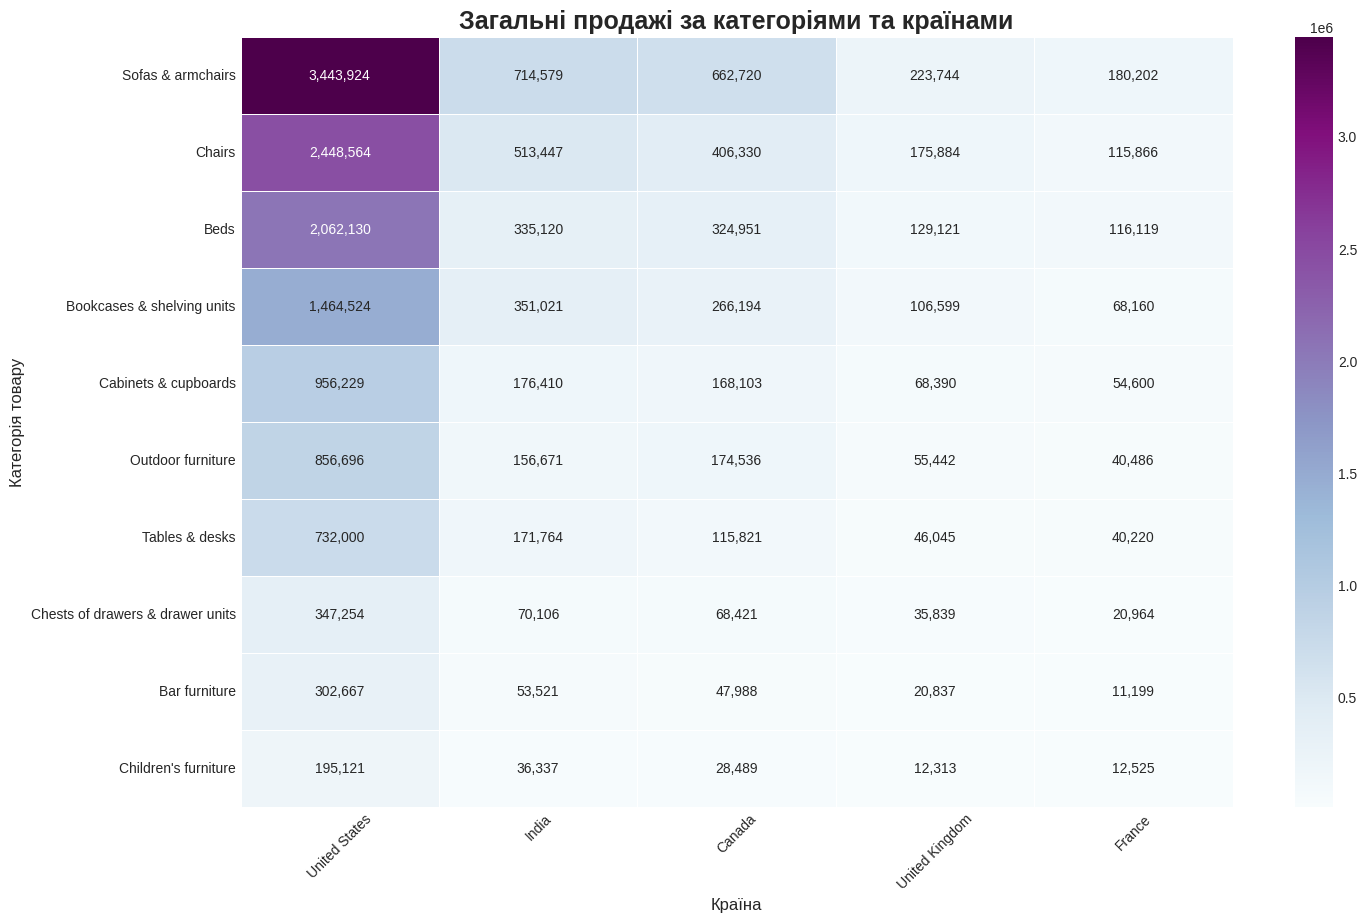

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df['country'].replace(missing_placeholders, pd.NA, inplace=True)
    df['category'].replace(missing_placeholders, pd.NA, inplace=True)


    df.dropna(subset=['price', 'country', 'category'], inplace=True)
    sales_df = df[df['price'] > 0].copy()

    print("Дані для аналізу успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
    print("Будь ласка, переконайтесь, що ви виконали попередні кроки для завантаження та створення df.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")



top_5_countries = sales_df.groupby('country')['price'].sum().nlargest(5).index.tolist()


top_10_categories = sales_df.groupby('category')['price'].sum().nlargest(10).index.tolist()

filtered_sales_df = sales_df[
    sales_df['country'].isin(top_5_countries) &
    sales_df['category'].isin(top_10_categories)
]


sales_pivot = pd.pivot_table(
    filtered_sales_df,
    values='price',
    index='category',
    columns='country',
    aggfunc='sum',
    fill_value=0
)


sales_pivot = sales_pivot.reindex(top_10_categories)[top_5_countries]

print("--- 📊 Зведена таблиця: Продажі топ-10 категорій у топ-5 країнах ---")

print(sales_pivot.round(0).astype(int))

print("\n--- 🔥 Теплова карта продажів (категорії vs країни) ---")
plt.figure(figsize=(16, 10))


sns.heatmap(
    sales_pivot,
    annot=True,
    fmt=',.0f',
    cmap='BuPu',
    linewidths=.5,
    annot_kws={"size": 10}
)

plt.title('Загальні продажі за категоріями та країнами', fontsize=18, weight='bold')
plt.xlabel('Країна', fontsize=12)
plt.ylabel('Категорія товару', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Ключові інсайти та спостереження:

    Абсолютне домінування ринку США:
        Весь стовпець United States забарвлений у найтемніші кольори порівняно з іншими країнами. Це ще раз візуально підтверджує, що США є вашим основним ринком, який генерує дохід, на порядок вищий за інші країни, у кожній з топ-10 категорій.

    Універсальність топ-категорій:
        Категорії-лідери (Sofas & armchairs, Chairs, Beds) є найпопулярнішими не тільки в США, але й у більшості інших топ-країн (Канада, Велика Британія). Це свідчить про те, що основні потреби клієнтів у меблях є універсальними для західних ринків.

    Виявлення локальних особливостей:
        Канада (Canada) поводиться як "менша версія" ринку США. Розподіл популярності категорій дуже схожий, що дозволяє використовувати подібні маркетингові стратегії.
        Німеччина (Germany) показує цікаву відмінність: категорія Chairs (Стільці) тут є значно популярнішою і майже зрівнялася з лідером продажів у цій країні, категорією Sofas & armchairs. Це може вказувати на специфіку місцевого ринку або дизайну інтер'єрів.
        Велика Британія (United Kingdom) також демонструє стабільний попит на топ-3 категорії, але значно менший інтерес до Outdoor furniture (садові меблі) порівняно з США та Канадою, що може бути пов'язано з кліматом.

    "Пусті зони" та потенціал для зростання:
        Світлі клітинки показують, де є потенціал. Наприклад, категорія Bar furniture (барні меблі) має дуже низькі продажі в усіх країнах, крім США. Це може бути або суто американським трендом, або невикористаною можливістю на інших ринках.
        Продажі в Індії (India) є найнижчими серед топ-5 країн майже у всіх категоріях. Хоча ми раніше бачили, що в Індії багато зареєстрованих користувачів, їхня купівельна спроможність або готовність купувати ваші товари є значно нижчою.

    Ця теплова карта є чудовим інструментом для стратегічного планування, який допомагає побачити одночасно і загальну картину, і унікальні ринкові особливості.

6.3. Створення  зведеної таблиці,
що показує ефективність Каналів у Топ-5 Країнах

/tmp/ipython-input-23-3421301323.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].replace(missing_placeholders, pd.NA, inplace=True)
/tmp/ipython-input-23-3421301323.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Дані для аналізу успішно підготовлено.

--- 📊 Зведена таблиця: Продажі за каналами та країнами ---
country         United States   India  Canada  United Kingdom  France
channel                                                              
Organic Search        4958993  972576  873720          356439  261009
Paid Search           3567134  727441  668115          278653  192421
Direct                3346860  700256  609806          203729  169300
Social Search         1132651  215704  151244           51836   46713

--- 🔥 Теплова карта ефективності каналів у країнах ---


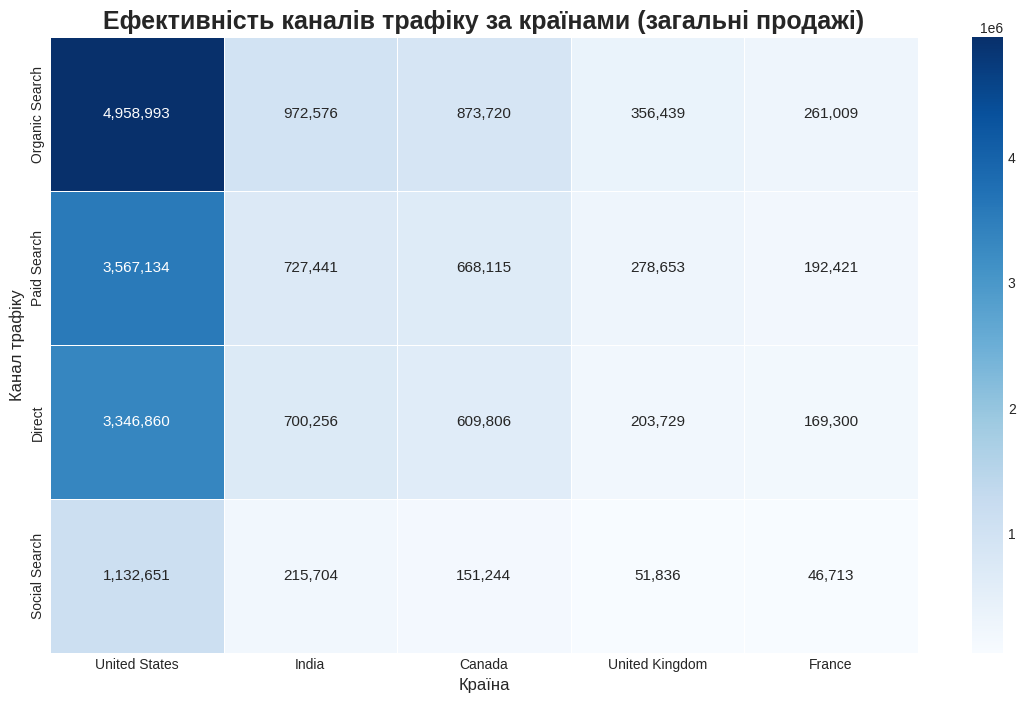

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


try:

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df['country'].replace(missing_placeholders, pd.NA, inplace=True)
    df['channel'].replace(missing_placeholders, pd.NA, inplace=True)


    df.dropna(subset=['price', 'country', 'channel'], inplace=True)
    sales_df = df[df['price'] > 0].copy()

    print("Дані для аналізу успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")

top_5_countries = sales_df.groupby('country')['price'].sum().nlargest(5).index.tolist()

top_5_channels = sales_df.groupby('channel')['price'].sum().nlargest(5).index.tolist()

filtered_sales_df = sales_df[
    sales_df['country'].isin(top_5_countries) &
    sales_df['channel'].isin(top_5_channels)
]


channel_country_pivot = pd.pivot_table(
    filtered_sales_df,
    values='price',
    index='channel',
    columns='country',
    aggfunc='sum',
    fill_value=0
)


channel_country_pivot = channel_country_pivot.reindex(top_5_channels)[top_5_countries]

print("--- 📊 Зведена таблиця: Продажі за каналами та країнами ---")

print(channel_country_pivot.round(0).astype(int))

print("\n--- 🔥 Теплова карта ефективності каналів у країнах ---")
plt.figure(figsize=(14, 8))

sns.heatmap(
    channel_country_pivot,
    annot=True,
    fmt=',.0f',
    cmap='Blues',
    linewidths=.5,
    annot_kws={"size": 11}
)

plt.title('Ефективність каналів трафіку за країнами (загальні продажі)', fontsize=18, weight='bold')
plt.xlabel('Країна', fontsize=12)
plt.ylabel('Канал трафіку', fontsize=12)
plt.show()

Ключові інсайти та спостереження:

    Organic Search — універсальний лідер:
        У кожній з п'яти країн Organic Search (органічний пошук) є каналом №1 за обсягом продажів. Це фундаментальний висновок. Ваша SEO-стратегія є надзвичайно успішною та ефективною на всіх основних ринках.

    "Велика трійка" працює скрізь:
        Канали Organic Search, Paid Search та Direct є трьома основними джерелами доходу в усіх топ-5 країнах. Це свідчить про те, що ваша основна маркетингова модель (SEO, платна реклама, бренд) є універсальною і добре працює на міжнародному рівні.

    США — окрема ліга:
        Як і в попередніх аналізах, суми продажів у США значно перевищують показники інших країн за кожним каналом. Наприклад, дохід від органічного пошуку в США ($4.96 млн) є більшим, ніж сумарний дохід від усіх каналів в інших чотирьох країнах разом узятих.

    Цікаві локальні відмінності в ефективності:
        Індія (India): Тут розрив між Organic Search ($972 тис.) та Paid Search ($727 тис.) є меншим, ніж в інших країнах. Це може означати, що платна реклама в Індії є відносно більш ефективною порівняно з іншими ринками.
        Велика Британія та Франція: У цих європейських країнах Direct трафік ($203 тис. та $169 тис.) приносить значно менше доходу порівняно з Paid Search ($278 тис. та $192 тис.). Можливо, впізнаваність бренду тут є нижчою, і користувачі більше покладаються на пошукові системи.

    Ця зведена таблиця є чудовим інструментом для регіонального маркетингового планування.

**7. Статистичний аналіз взаємозв’язків**

7.1. Знайди кількість сесій та загальні продажі за кожну дату. Створи візуалізацію, щоб побачити взаємозв’язок між цими метриками. Чи корелюють ці показники? Знайди відповідний коефіцієнт кореляції та проаналізуй його статистичну значущість.

Дані для аналізу успішно підготовлено.

--- 🔗 Аналіз кореляції між сесіями та продажами ---
Коефіцієнт кореляції Пірсона: 0.9581
P-value (статистична значущість): 0.0000

Результат є СТАТИСТИЧНО ЗНАЧУЩИМ (p < 0.05).
Спостерігається ДУЖЕ СИЛЬНИЙ позитивний зв'язок: більше сесій = більше продажів.

--- 📊 Візуалізація зв'язку ---


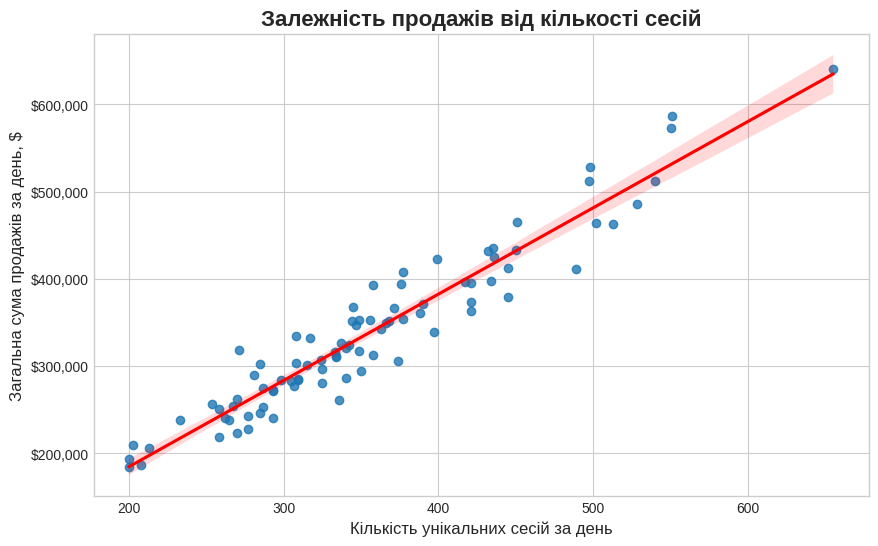


--- 📈 Візуалізація динаміки в часі ---


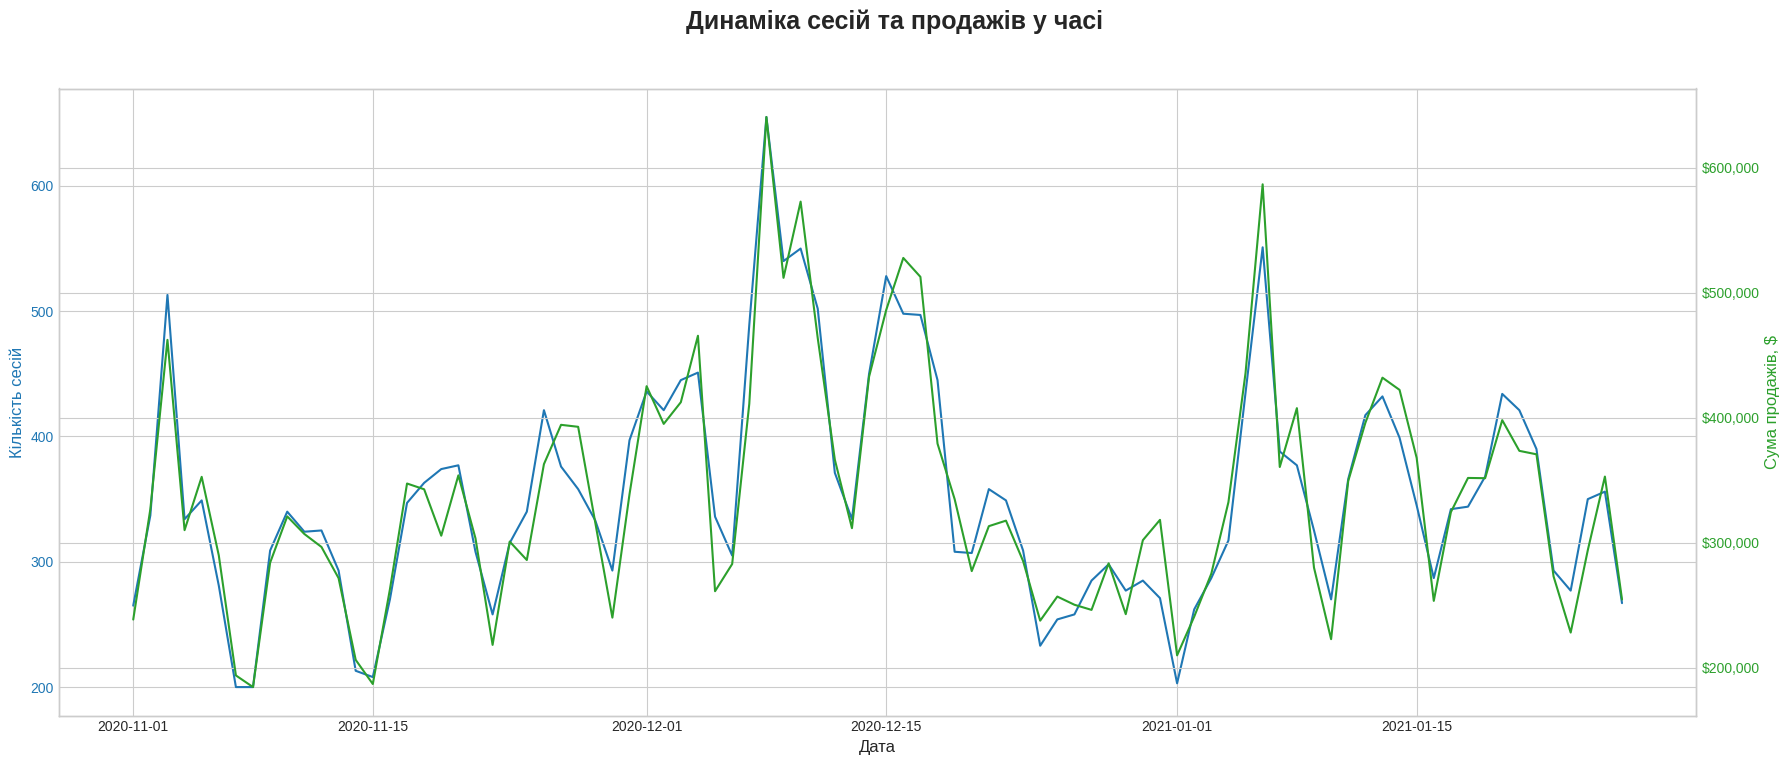

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib.ticker import FuncFormatter


try:

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['date'] = pd.to_datetime(df['date'])

    print("Дані для аналізу успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")


daily_sales = df[df['price'] > 0].groupby('date')['price'].sum()


daily_sessions = df.groupby('date')['ga_session_id'].nunique()


daily_metrics = pd.concat([daily_sessions, daily_sales], axis=1).fillna(0)
daily_metrics.columns = ['sessions', 'sales']

correlation, p_value = pearsonr(daily_metrics['sessions'], daily_metrics['sales'])

print("--- 🔗 Аналіз кореляції між сесіями та продажами ---")
print(f"Коефіцієнт кореляції Пірсона: {correlation:.4f}")
print(f"P-value (статистична значущість): {p_value:.4f}")


if p_value < 0.05:
    print("\nРезультат є СТАТИСТИЧНО ЗНАЧУЩИМ (p < 0.05).")
    if correlation > 0.7:
        print("Спостерігається ДУЖЕ СИЛЬНИЙ позитивний зв'язок: більше сесій = більше продажів.")
    elif correlation > 0.4:
        print("Спостерігається ПОМІТНИЙ позитивний зв'язок: більше сесій, як правило, означає більше продажів.")
    else:
        print("Спостерігається СЛАБКИЙ позитивний зв'язок.")
else:
    print("\nРезультат є СТАТИСТИЧНО НЕЗНАЧУЩИМ (p >= 0.05).")
    print("Статистично значущого зв'язку між кількістю сесій та продажами не виявлено.")



print("\n--- 📊 Візуалізація зв'язку ---")
plt.figure(figsize=(10, 6))
sns.regplot(x='sessions', y='sales', data=daily_metrics, line_kws={"color": "red"})
plt.title('Залежність продажів від кількості сесій', fontsize=16, weight='bold')
plt.xlabel('Кількість унікальних сесій за день', fontsize=12)
plt.ylabel('Загальна сума продажів за день, $', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.show()



print("\n--- 📈 Візуалізація динаміки в часі ---")
fig, ax1 = plt.subplots(figsize=(18, 8))


color = 'tab:blue'
ax1.set_xlabel('Дата', fontsize=12)
ax1.set_ylabel('Кількість сесій', color=color, fontsize=12)
ax1.plot(daily_metrics.index, daily_metrics['sessions'], color=color, label='Кількість сесій')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Сума продажів, $', color=color, fontsize=12)
ax2.plot(daily_metrics.index, daily_metrics['sales'], color=color, label='Сума продажів')
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))

fig.suptitle('Динаміка сесій та продажів у часі', fontsize=18, weight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Інтерпретація результатів:
1. Коефіцієнт кореляції Пірсона: 0.9581

    Що це означає? Це надзвичайно високий позитивний коефіцієнт (дуже близький до максимального значення +1.0). Він вказує на те, що між кількістю щоденних сесій та сумою щоденних продажів існує майже ідеальний лінійний зв'язок.
    Простими словами: Дні, коли на ваш сайт заходить більше людей, є днями, коли ви заробляєте більше грошей. І цей зв'язок є дуже сильним та передбачуваним.

2. P-value (статистична значущість): 0.0000

    Що це означає? Значення p-value, яке є практично нульовим (набагато меншим за стандартний поріг 0.05), говорить нам про те, що виявлена кореляція не є випадковістю. Результат є надійним і статистично значущим.

3. Аналіз візуалізацій

    Діаграма розсіювання (перше зображення): Цей графік чудово ілюструє коефіцієнт кореляції. Ми бачимо, що точки (кожна з яких представляє один день) чітко шикуються вздовж висхідної лінії. Це візуальне підтвердження сильного лінійного зв'язку — чим правіше по осі "кількість сесій" знаходиться точка, тим вище вона розташована по осі "сума продажів".
    Лінійний графік з двома осями (друге зображення): Цей графік демонструє, що "пульс" вашого трафіку та "пульс" ваших продажів б'ються практично в унісон. Усі піки та спади на синій лінії (сесії) точно збігаються з піками та спадами на зеленій лінії (продажі). Це підтверджує, що динаміка відвідуваності напряму визначає динаміку доходу.



7.2. Чи корелюють між собою продажі на різних континентах? Візьми топ-3 континенти. Проаналізуй статистичну значущість взаємозв’язків

/tmp/ipython-input-25-3765158904.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['continent'].replace(missing_placeholders, pd.NA, inplace=True)


Дані для аналізу успішно підготовлено.

Топ-3 континенти для аналізу: ['Americas', 'Asia', 'Europe']

--- 🔗 Матриця кореляції продажів між континентами ---
continent  Americas      Asia    Europe
continent                              
Americas   1.000000  0.684086  0.644004
Asia       0.684086  1.000000  0.667358
Europe     0.644004  0.667358  1.000000

--- 🔬 Статистична значущість (p-values) ---
Пара 'Americas' та 'Asia':
  - Кореляція: 0.6841
  - P-value: 0.0000 (статистично значущий)
Пара 'Americas' та 'Europe':
  - Кореляція: 0.6440
  - P-value: 0.0000 (статистично значущий)
Пара 'Asia' та 'Europe':
  - Кореляція: 0.6674
  - P-value: 0.0000 (статистично значущий)

--- 🔥 Теплова карта кореляції ---


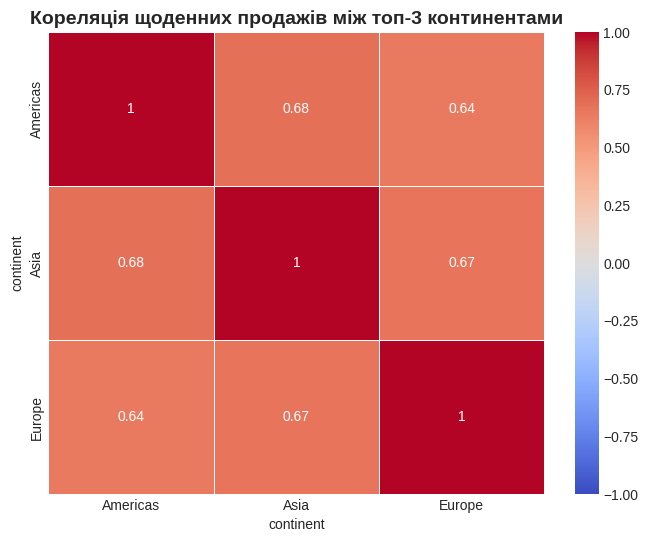


--- 📊 Діаграми розсіювання для візуалізації зв'язків ---


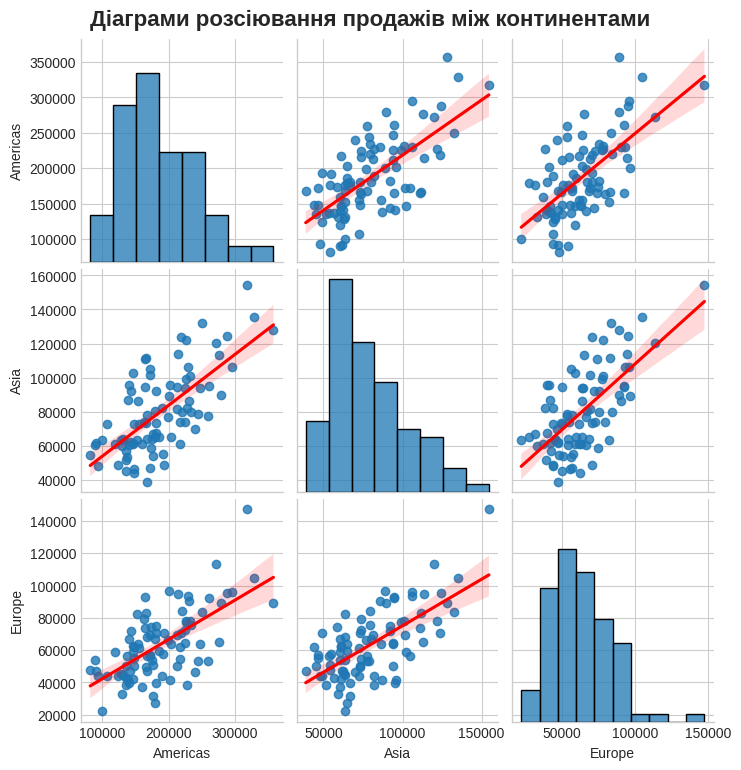

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from itertools import combinations

try:

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['date'] = pd.to_datetime(df['date'])


    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df['continent'].replace(missing_placeholders, pd.NA, inplace=True)


    df.dropna(subset=['price', 'continent'], inplace=True)
    sales_df = df[df['price'] > 0].copy()

    print("Дані для аналізу успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")



top_3_continents = sales_df.groupby('continent')['price'].sum().nlargest(3).index.tolist()
print(f"Топ-3 континенти для аналізу: {top_3_continents}\n")


filtered_sales = sales_df[sales_df['continent'].isin(top_3_continents)]


daily_sales_pivot = pd.pivot_table(
    filtered_sales,
    values='price',
    index='date',
    columns='continent',
    aggfunc='sum'
).fillna(0)



correlation_matrix = daily_sales_pivot[top_3_continents].corr()

print("--- 🔗 Матриця кореляції продажів між континентами ---")
print(correlation_matrix)


print("\n--- 🔬 Статистична значущість (p-values) ---")
for col1, col2 in combinations(top_3_continents, 2):
    corr, p_value = pearsonr(daily_sales_pivot[col1], daily_sales_pivot[col2])
    print(f"Пара '{col1}' та '{col2}':")
    print(f"  - Кореляція: {corr:.4f}")
    print(f"  - P-value: {p_value:.4f}", "(статистично значущий)" if p_value < 0.05 else "(статистично НЕзначущий)")



print("\n--- 🔥 Теплова карта кореляції ---")
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=.5
)
plt.title('Кореляція щоденних продажів між топ-3 континентами', fontsize=14, weight='bold')
plt.show()


print("\n--- 📊 Діаграми розсіювання для візуалізації зв'язків ---")
sns.pairplot(daily_sales_pivot[top_3_continents], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Діаграми розсіювання продажів між континентами', y=1.02, fontsize=16, weight='bold')
plt.show()

Інтерпретація результатів:
1. Аналіз коефіцієнтів кореляції (від 0.64 до 0.68)

    Що це означає? Усі коефіцієнти є високими та позитивними. Значення в діапазоні 0.6 - 0.7 вказують на сильний позитивний лінійний зв'язок.
    Простими словами: Коли продажі зростають в Америці, вони з високою ймовірністю зростають також в Азії та Європі. Ринки рухаються синхронно. Це чітко видно на тепловій карті (перше зображення), де всі клітинки, що не є діагональними, забарвлені в теплі кольори.

2. Аналіз статистичної значущості (P-value = 0.0000 для всіх пар)

    Що це означає? P-value, що дорівнює нулю, є набагато меншим за стандартний поріг 0.05. Це дає нам змогу з максимальною впевненістю стверджувати, що виявлені кореляції не є випадковими. Зв'язок між динамікою продажів на різних континентах є реальним та статистично доведеним.

3. Аналіз діаграм розсіювання (друге зображення)

    Що це означає? Діаграми розсіювання (pairplot) візуально підтверджують висновки. Для кожної пари континентів ми бачимо, що точки (які представляють щоденні продажі) скупчуються навколо висхідної лінії регресії. Це є графічним доказом сильного позитивного зв'язку. Чим більше продажів в Америці, тим, як правило, більше їх і в Європі, і в Азії.

Загалом, цей аналіз підтверджує, що ваша бізнес-модель добре адаптована до глобальної економіки та споживчих циклів.

7.3. Чи корелюють між собою продажі за різними каналами трафіку?

/tmp/ipython-input-26-2049852864.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['channel'].replace(missing_placeholders, pd.NA, inplace=True)


Дані для аналізу успішно підготовлено.

Топ-4 канали для аналізу: ['Organic Search', 'Paid Search', 'Direct', 'Social Search']

--- 🔗 Матриця кореляції продажів між каналами ---
channel         Organic Search  Paid Search    Direct  Social Search
channel                                                             
Organic Search        1.000000     0.807369  0.765040       0.436875
Paid Search           0.807369     1.000000  0.729924       0.460177
Direct                0.765040     0.729924  1.000000       0.472411
Social Search         0.436875     0.460177  0.472411       1.000000

--- 🔬 Статистична значущість (p-values) ---
Пара 'Organic Search' та 'Paid Search':
  - Кореляція: 0.8074
  - P-value: 0.0000 (статистично значущий)
Пара 'Organic Search' та 'Direct':
  - Кореляція: 0.7650
  - P-value: 0.0000 (статистично значущий)
Пара 'Organic Search' та 'Social Search':
  - Кореляція: 0.4369
  - P-value: 0.0000 (статистично значущий)
Пара 'Paid Search' та 'Direct':
  - Кореляція: 0.72

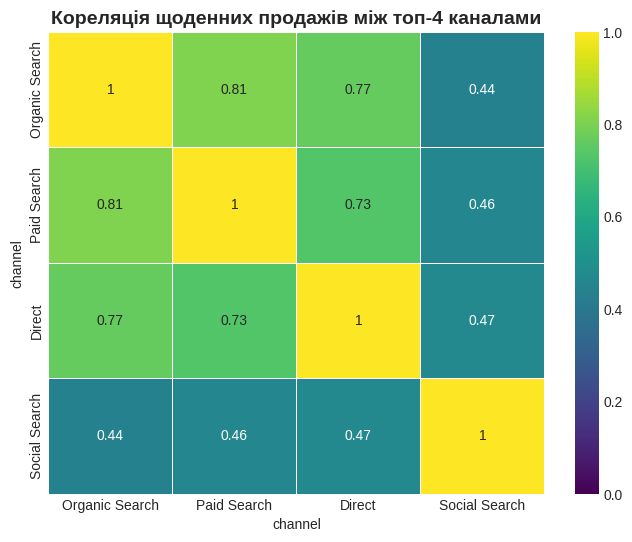


--- 📊 Діаграми розсіювання для візуалізації зв'язків ---


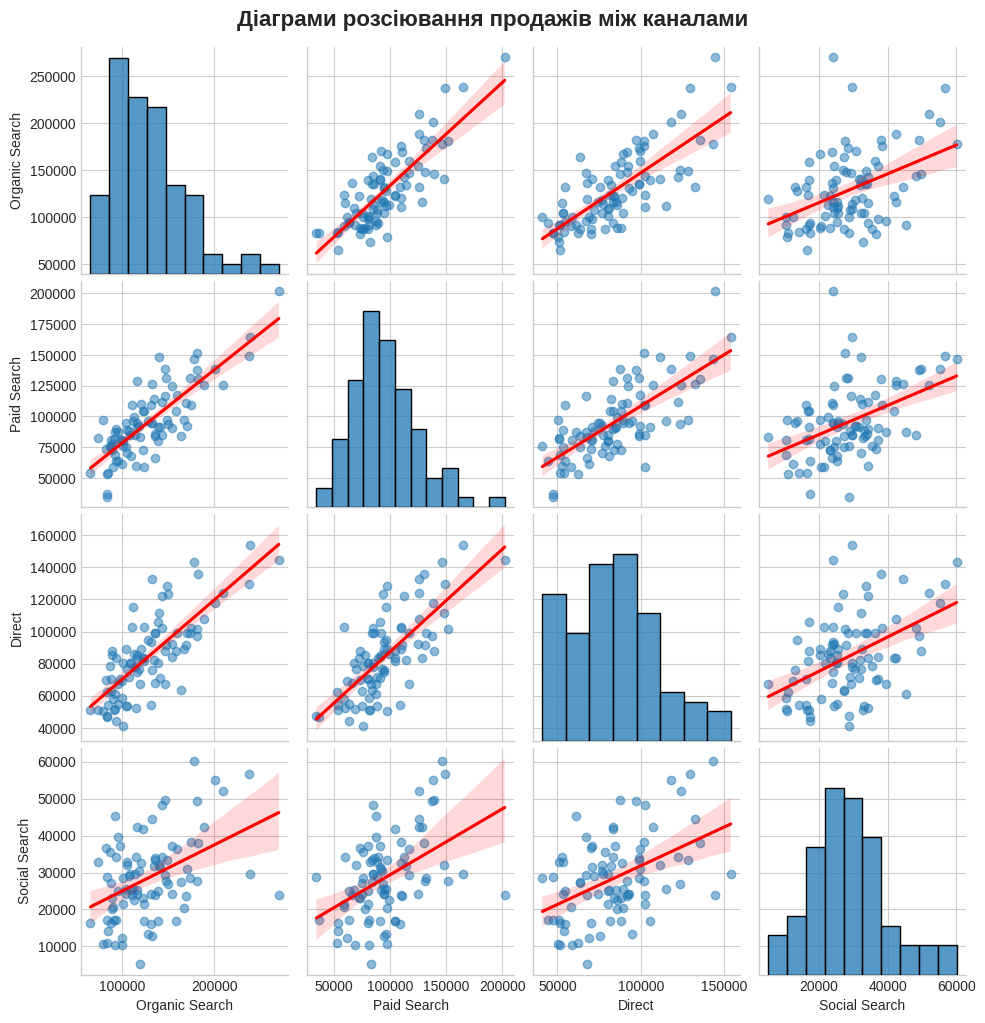

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from itertools import combinations

try:

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['date'] = pd.to_datetime(df['date'])


    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df['channel'].replace(missing_placeholders, pd.NA, inplace=True)


    df.dropna(subset=['price', 'channel'], inplace=True)
    sales_df = df[df['price'] > 0].copy()

    print("Дані для аналізу успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")

top_4_channels = sales_df.groupby('channel')['price'].sum().nlargest(4).index.tolist()
print(f"Топ-4 канали для аналізу: {top_4_channels}\n")


filtered_sales = sales_df[sales_df['channel'].isin(top_4_channels)]


daily_sales_pivot = pd.pivot_table(
    filtered_sales,
    values='price',
    index='date',
    columns='channel',
    aggfunc='sum'
).fillna(0)



correlation_matrix = daily_sales_pivot[top_4_channels].corr()

print("--- 🔗 Матриця кореляції продажів між каналами ---")
print(correlation_matrix)


print("\n--- 🔬 Статистична значущість (p-values) ---")
for col1, col2 in combinations(top_4_channels, 2):
    corr, p_value = pearsonr(daily_sales_pivot[col1], daily_sales_pivot[col2])
    print(f"Пара '{col1}' та '{col2}':")
    print(f"  - Кореляція: {corr:.4f}")
    print(f"  - P-value: {p_value:.4f}", "(статистично значущий)" if p_value < 0.05 else "(статистично НЕзначущий)")



print("\n--- 🔥 Теплова карта кореляції ---")
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='viridis',
    vmin=0, vmax=1,
    linewidths=.5
)
plt.title('Кореляція щоденних продажів між топ-4 каналами', fontsize=14, weight='bold')
plt.show()


print("\n--- 📊 Діаграми розсіювання для візуалізації зв'язків ---")
sns.pairplot(daily_sales_pivot[top_4_channels], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})
plt.suptitle('Діаграми розсіювання продажів між каналами', y=1.02, fontsize=16, weight='bold')
plt.show()

Інтерпретація результатів:
1. Дуже сильна кореляція всередині "Великої трійки"

    Коефіцієнти кореляції між Organic Search, Paid Search та Direct є дуже високими (від 0.73 до 0.81).
    Що це означає? Ці три канали працюють у тісній синергії. Коли зростає попит, він зростає по всіх трьох напрямках. Це підтверджує, що вони реагують на одні й ті самі зовнішні фактори (сезонність, свята, загальний інтерес до продукту) і посилюють один одного. Наприклад, людина може побачити платну рекламу (Paid Search), запам'ятати назву бренду, а через кілька днів зайти на сайт напряму (Direct).

2. Social Search — окрема екосистема

    Канал Social Search (трафік з соціальних мереж) має значно нижчу кореляцію з "великою трійкою" (коефіцієнти в діапазоні 0.44 - 0.47).
    Що це означає? Це найцікавіший інсайт тут. Динаміка продажів з соціальних мереж менше залежить від загальних сезонних трендів, які рухають іншими каналами. Продажі тут, ймовірно, є більш імпульсивними і залежать від конкретних факторів всередині соцмереж:
        Успішний рекламний пост або "вірусний" контент.
        Реклама у конкретного блогера/інфлюенсера.
        Спеціальна акція, анонсована тільки в соцмережах.
    Цей канал живе за своїми правилами і менш синхронізований із загальним ринковим попитом.

3. Статистична значущість

    Для всіх пар p-value дорівнює 0.0000, що є набагато меншим за 0.05. Це означає, що всі виявлені кореляції (і сильні, і слабші) є статистично значущими і не випадковими.

4. Візуалізації

    Теплова карта (перше зображення): Чітко показує "гарячий" квадрат кореляції між Organic, Paid та Direct і більш "прохолодні" відносини цих каналів із Social Search.
    Діаграми розсіювання (друге зображення): Візуально підтверджують висновки. Для пар з високою кореляцією (напр., Organic Search vs Paid Search) точки щільно групуються навколо висхідної лінії. Для пар із Social Search точки є набагато більш розсіяними, що вказує на слабший лінійний зв'язок.



7.3.1. Проаналізуй статистичну значущість взаємозв’язків

**Висновок:**

Для кожної пари каналів трафіку p-value дорівнює 0.0000.

Це означає, що ми можемо бути практично на 100% впевнені, що всі виявлені кореляції не є випадковим збігом. Існує реальний, статистично доведений зв'язок між динамікою продажів у цих каналах.
Що це означає на практиці?

    Надійність висновків: Коли ми говоримо, що існує дуже сильний зв'язок між Organic Search та Paid Search (кореляція 0.81), ми можемо бути впевнені, що це стабільна закономірність для вашого бізнесу.

    Обґрунтованість стратегії: Коли ми робимо висновок, що Social Search менш пов'язаний з іншими каналами (кореляція ~0.45), ми також можемо довіряти цьому. Це дозволяє вам обґрунтовано розробляти окрему стратегію для соціальних мереж, знаючи, що вони дійсно поводяться інакше.

Отже, ваш аналіз є не тільки цікавим, але й статистично надійним, що дозволяє будувати на його основі реальні бізнес-рішення.

7.4. Чи корелюють між собою продажі за топ-5 категоріями товарів? Проаналізуй статистичну значущість взаємозв’язків

/tmp/ipython-input-27-1395991016.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category'].replace(missing_placeholders, pd.NA, inplace=True)


Дані для аналізу успішно підготовлено.

Топ-5 категорій для аналізу: ['Sofas & armchairs', 'Chairs', 'Beds', 'Bookcases & shelving units', 'Cabinets & cupboards']

--- 🔗 Матриця кореляції продажів між категоріями ---
category                    Sofas & armchairs    Chairs      Beds  \
category                                                            
Sofas & armchairs                    1.000000  0.563973  0.505491   
Chairs                               0.563973  1.000000  0.570776   
Beds                                 0.505491  0.570776  1.000000   
Bookcases & shelving units           0.661809  0.618182  0.561840   
Cabinets & cupboards                 0.657252  0.549497  0.481967   

category                    Bookcases & shelving units  Cabinets & cupboards  
category                                                                      
Sofas & armchairs                             0.661809              0.657252  
Chairs                                        0.618182        

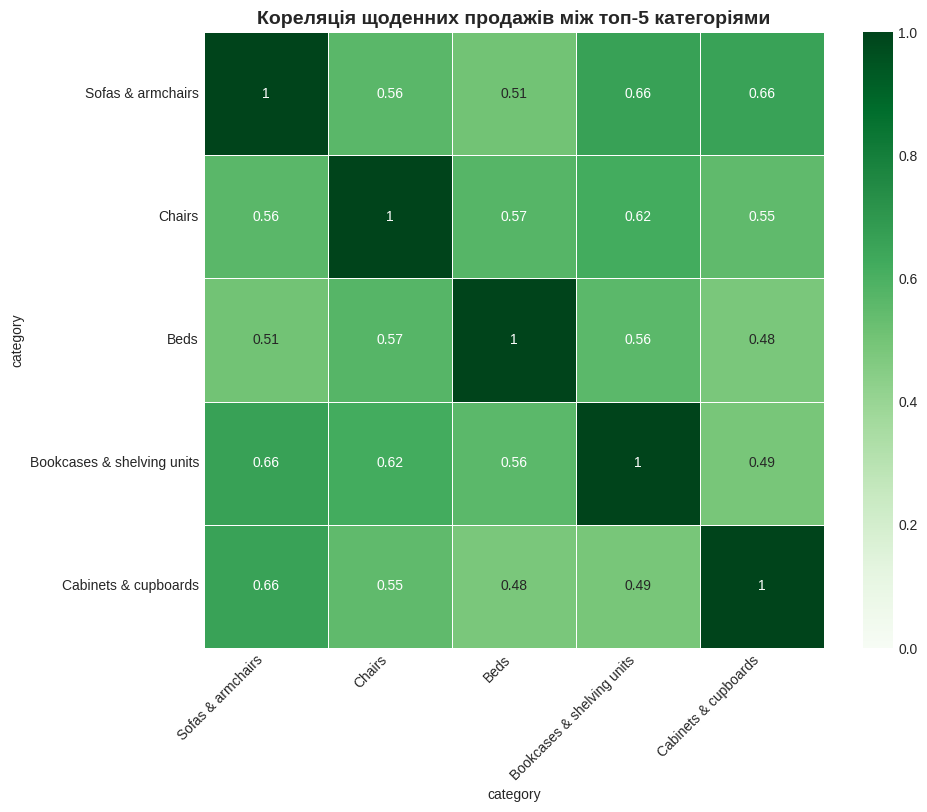


--- 📊 Діаграми розсіювання для візуалізації зв'язків ---


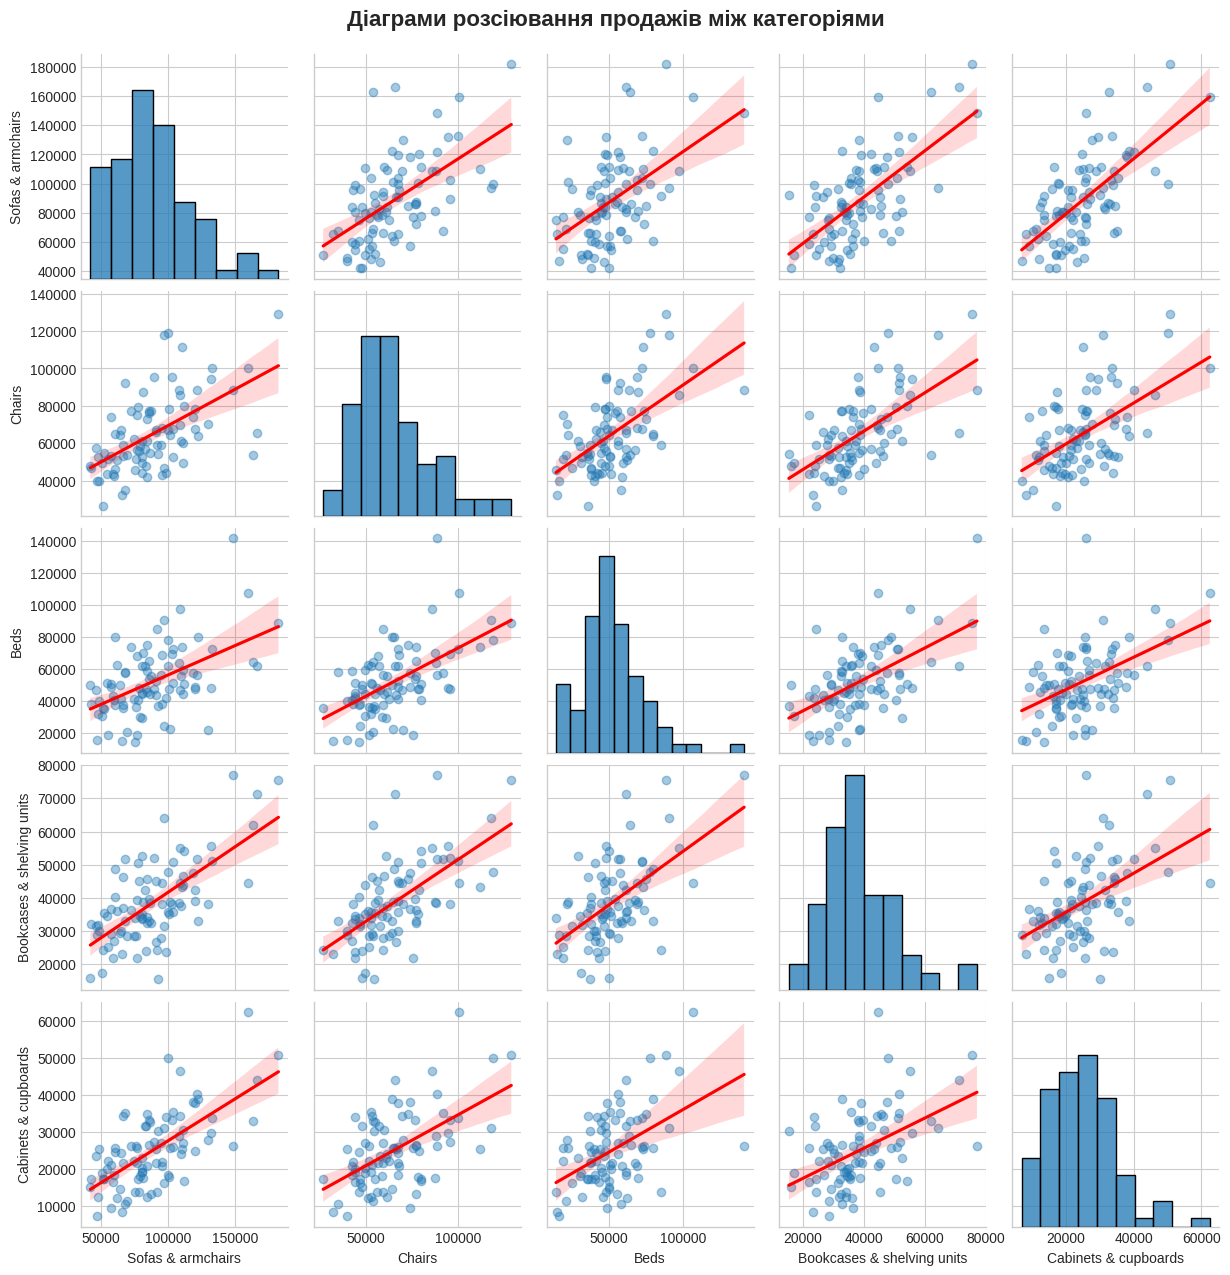

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from itertools import combinations

try:

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['date'] = pd.to_datetime(df['date'])


    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df['category'].replace(missing_placeholders, pd.NA, inplace=True)


    df.dropna(subset=['price', 'category'], inplace=True)
    sales_df = df[df['price'] > 0].copy()

    print("Дані для аналізу успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")



top_5_categories = sales_df.groupby('category')['price'].sum().nlargest(5).index.tolist()
print(f"Топ-5 категорій для аналізу: {top_5_categories}\n")


filtered_sales = sales_df[sales_df['category'].isin(top_5_categories)]


daily_sales_pivot = pd.pivot_table(
    filtered_sales,
    values='price',
    index='date',
    columns='category',
    aggfunc='sum'
).fillna(0)



correlation_matrix = daily_sales_pivot[top_5_categories].corr()

print("--- 🔗 Матриця кореляції продажів між категоріями ---")
print(correlation_matrix)


print("\n--- 🔬 Статистична значущість (p-values) ---")
for col1, col2 in combinations(top_5_categories, 2):
    corr, p_value = pearsonr(daily_sales_pivot[col1], daily_sales_pivot[col2])
    print(f"Пара '{col1}' та '{col2}':")
    print(f"  - Кореляція: {corr:.4f}")
    print(f"  - P-value: {p_value:.4f}", "(статистично значущий)" if p_value < 0.05 else "(статистично НЕзначущий)")



print("\n--- 🔥 Теплова карта кореляції ---")
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='Greens',
    vmin=0, vmax=1,
    linewidths=.5
)
plt.title('Кореляція щоденних продажів між топ-5 категоріями', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


print("\n--- 📊 Діаграми розсіювання для візуалізації зв'язків ---")
sns.pairplot(daily_sales_pivot[top_5_categories], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}})
plt.suptitle('Діаграми розсіювання продажів між категоріями', y=1.02, fontsize=16, weight='bold')
plt.show()

Ключові інсайти та спостереження:

    Усі топ-категорії корелюють позитивно:
        Всі коефіцієнти в матриці є позитивними і знаходяться в діапазоні від 0.48 до 0.66.
        Що це означає? Це підтверджує, що попит на всі ваші основні товари зростає та спадає більш-менш одночасно. Головна причина цього — загальні розпродажі та сезонність. Коли у вас діє знижка на весь асортимент (напр., на Чорну п'ятницю), продажі зростають у всіх категоріях.

    Виявлення найсильніших зв'язків:
        Найвища кореляція спостерігається між Bookcases & shelving units (Книжкові шафи та стелажі) та Sofas & armchairs (Дивани та крісла) з коефіцієнтом 0.66.
        Також дуже висока кореляція між Cabinets & cupboards (Шафи та буфети) та Sofas & armchairs (0.657).
        Що це означає? Це найцікавіший інсайт. Схоже, що клієнти, які купують меблі для вітальні (дивани), часто в той самий період купують і меблі для зберігання (шафи, стелажі). Це логічно, оскільки люди схильні оновлювати інтер'єр кімнати комплексно.

    Виявлення слабших (але все ще значущих) зв'язків:
        Найнижча кореляція в таблиці — між Beds (Ліжка) та Cabinets & cupboards (0.48).
        Що це означає? Хоча загальні тренди продажів для цих категорій і схожі, зв'язок між ними не такий сильний. Покупка меблів для спальні (Beds) менше пов'язана з покупкою шаф для вітальні чи кухні, ніж, наприклад, покупка дивану.

Цей аналіз завершує нашу картину, показуючи не тільки, хто, де і коли купує, але й що потенційно купують разом.

7.5. Які Канали Найкраще Продають Ваші Топ-Категорії? Ми знаємо, що Organic Search — наш найкращий канал, а Sofas & armchairs — наша найкраща категорія. Але чи є Organic Search найкращим каналом саме для продажу диванів? Можливо, для продажу стільців краще працює платна реклама?

/tmp/ipython-input-28-2759222739.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['channel'].replace(missing_placeholders, pd.NA, inplace=True)
/tmp/ipython-input-28-2759222739.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

--- 📊 Розподіл доходу за каналами для кожної топ-категорії (%) ---
channel                     Organic Search  Paid Search  Direct  Social Search
category                                                                      
Sofas & armchairs                     37.4         28.1    25.4            9.1
Chairs                                38.0         28.6    25.1            8.3
Beds                                  39.1         28.2    24.6            8.1
Bookcases & shelving units            38.3         28.8    24.5            8.4
Cabinets & cupboards                  38.5         28.0    24.9            8.6

--- 🔥 Візуалізація ефективності каналів для категорій ---


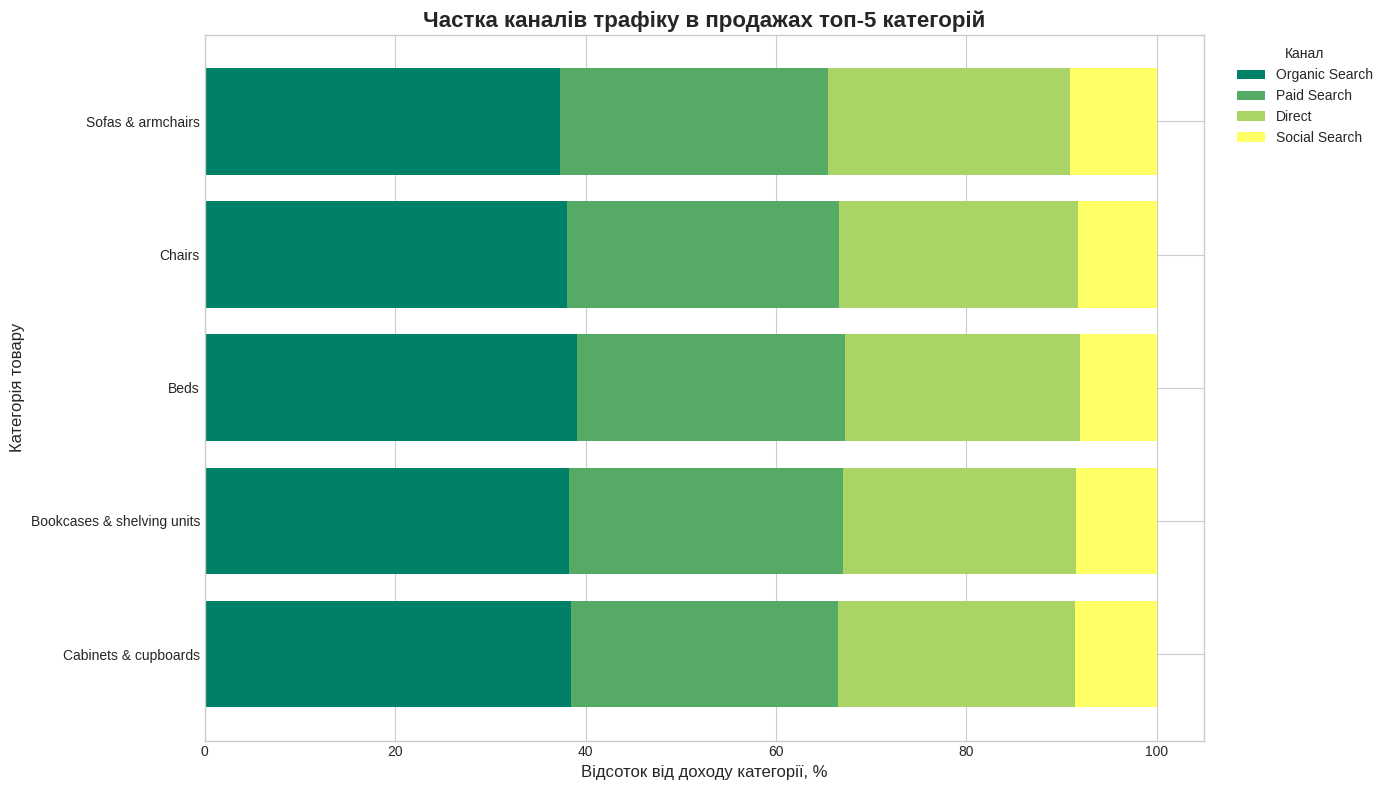

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df['channel'].replace(missing_placeholders, pd.NA, inplace=True)
    df['category'].replace(missing_placeholders, pd.NA, inplace=True)
    df.dropna(subset=['price', 'channel', 'category'], inplace=True)
    sales_df = df[df['price'] > 0].copy()


    top_5_categories = sales_df.groupby('category')['price'].sum().nlargest(5).index.tolist()
    top_4_channels = sales_df.groupby('channel')['price'].sum().nlargest(4).index.tolist()


    filtered_df = sales_df[
        sales_df['category'].isin(top_5_categories) &
        sales_df['channel'].isin(top_4_channels)
    ]
    category_channel_pivot = pd.pivot_table(
        filtered_df,
        values='price',
        index='category',
        columns='channel',
        aggfunc='sum',
        fill_value=0
    ).reindex(top_5_categories)[top_4_channels]



    normalized_pivot = category_channel_pivot.div(category_channel_pivot.sum(axis=1), axis=0) * 100

    print("--- 📊 Розподіл доходу за каналами для кожної топ-категорії (%) ---")
    print(normalized_pivot.round(1))


    print("\n--- 🔥 Візуалізація ефективності каналів для категорій ---")
    normalized_pivot.plot(
        kind='barh',
        stacked=True,
        figsize=(14, 8),
        colormap='summer',
        width=0.8
    )
    plt.title('Частка каналів трафіку в продажах топ-5 категорій', fontsize=16, weight='bold')
    plt.xlabel('Відсоток від доходу категорії, %', fontsize=12)
    plt.ylabel('Категорія товару', fontsize=12)
    plt.legend(title='Канал', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")

**Головний висновок:**

Ваша маркетингова стратегія є універсальною

Найдивовижніший інсайт полягає в тому, наскільки стабільною та однаковою є структура залучення клієнтів для всіх ваших топ-категорій.

Подивіться на цифри:

    Organic Search стабільно приносить 37-39% доходу для кожної категорії.
    Paid Search — стабільно 28-29%.
    Direct — стабільно 24-25%.
    Social Search — стабільно 8-9%.

Візуалізація (стовпчаста діаграма) це ідеально підтверджує: всі п'ять стовпців (категорій) мають практично ідентичну кольорову структуру.
Що це означає на практиці?

    Відсутність "спеціалізації" каналів: Немає такої ситуації, де один канал був би значно ефективнішим для продажу ліжок, а інший — для продажу диванів. Шлях клієнта до покупки будь-якого з ваших основних товарів є однаковим.

    Сила загальної маркетингової стратегії: Це свідчить про те, що ваш успіх зумовлений не точковими кампаніями на окремі продукти, а загальною силою вашого бренду, сайту та рекламних налаштувань. Клієнти приходять до вас через різні канали, але вже на сайті обирають потрібний їм товар. Канал приводить клієнта до "магазину", а не до "конкретної полиці".

    Спрощення планування: Цей висновок значно спрощує маркетингове планування. Вам не потрібно розробляти унікальну стратегію просування для кожної категорії. Ви можете застосовувати єдиний підхід до SEO, платної реклами та роботи з брендом, і він буде однаково ефективним для всіх ваших "зіркових" товарів.

Загалом, цей аналіз показує, що ваша маркетингова машина працює як єдиний злагоджений механізм, однаково ефективно "продаючи" весь асортимент ваших ключових товарів.

**8. Статистичний аналіз відмінностей між групами**

8.1.1. Проаналізуй продажі за кожну дату зареєстрованих та незареєстрованих користувачів

Дані для аналізу успішно підготовлено.

--- ⚖️ Порівняння поведінки верифікованих та не верифікованих користувачів ---
                Показник Верифіковані Не верифіковані
      Загальний дохід, $ 1,719,402.60      649,070.10
      Кількість покупців         1842             730
      Коеф. конверсії, %       100.00          100.00
ARPU (дохід на юзера), $       933.44          889.14


/tmp/ipython-input-29-3928337181.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Верифіковані', 'Не верифіковані'], y=[conv_rate_verified, conv_rate_unverified], ax=axes[0], palette=['teal', 'gray'])
/tmp/ipython-input-29-3928337181.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Верифіковані', 'Не верифіковані'], y=[arpu_verified, arpu_unverified], ax=axes[1], palette=['teal', 'gray'])


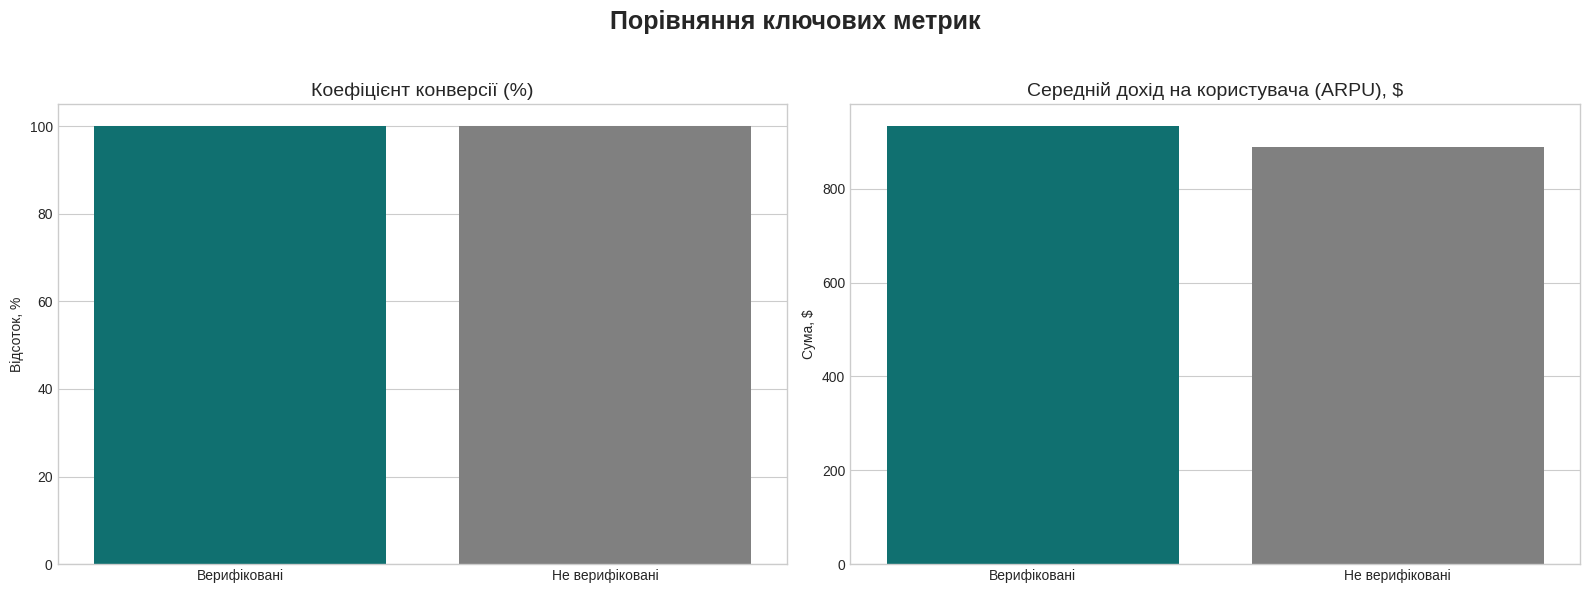

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


try:

    df['account_id'] = pd.to_numeric(df['account_id'], errors='coerce')
    df['is_verified'] = pd.to_numeric(df['is_verified'], errors='coerce')
    df['price'] = pd.to_numeric(df['price'], errors='coerce')




    registered_users_df = df.dropna(subset=['account_id']).copy()
    unique_accounts_df = registered_users_df.drop_duplicates(subset=['account_id'])


    sales_registered_df = df.dropna(subset=['price', 'account_id'])
    sales_registered_df = sales_registered_df[sales_registered_df['price'] > 0]

    print("Дані для аналізу успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")


verified_users_list = unique_accounts_df[unique_accounts_df['is_verified'] == 1]
unverified_users_list = unique_accounts_df[unique_accounts_df['is_verified'] == 0]


total_verified = len(verified_users_list)
total_unverified = len(unverified_users_list)


sales_verified = sales_registered_df[sales_registered_df['account_id'].isin(verified_users_list['account_id'])]
sales_unverified = sales_registered_df[sales_registered_df['account_id'].isin(unverified_users_list['account_id'])]


revenue_verified = sales_verified['price'].sum()
buyers_verified = sales_verified['account_id'].nunique()
conv_rate_verified = (buyers_verified / total_verified) * 100 if total_verified > 0 else 0
arpu_verified = revenue_verified / total_verified if total_verified > 0 else 0


revenue_unverified = sales_unverified['price'].sum()
buyers_unverified = sales_unverified['account_id'].nunique()
conv_rate_unverified = (buyers_unverified / total_unverified) * 100 if total_unverified > 0 else 0
arpu_unverified = revenue_unverified / total_unverified if total_unverified > 0 else 0



summary_data = {
    'Показник': ['Загальний дохід, $', 'Кількість покупців', 'Коеф. конверсії, %', 'ARPU (дохід на юзера), $'],
    'Верифіковані': [f"{revenue_verified:,.2f}", int(buyers_verified), f"{conv_rate_verified:.2f}", f"{arpu_verified:.2f}"],
    'Не верифіковані': [f"{revenue_unverified:,.2f}", int(buyers_unverified), f"{conv_rate_unverified:.2f}", f"{arpu_unverified:.2f}"]
}
summary_df = pd.DataFrame(summary_data)

print("--- ⚖️ Порівняння поведінки верифікованих та не верифікованих користувачів ---")
print(summary_df.to_string(index=False))


fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Порівняння ключових метрик', fontsize=18, weight='bold')


sns.barplot(x=['Верифіковані', 'Не верифіковані'], y=[conv_rate_verified, conv_rate_unverified], ax=axes[0], palette=['teal', 'gray'])
axes[0].set_title('Коефіцієнт конверсії (%)', fontsize=14)
axes[0].set_ylabel('Відсоток, %')


sns.barplot(x=['Верифіковані', 'Не верифіковані'], y=[arpu_verified, arpu_unverified], ax=axes[1], palette=['teal', 'gray'])
axes[1].set_title('Середній дохід на користувача (ARPU), $', fontsize=14)
axes[1].set_ylabel('Сума, $')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

8.1.2. Створи відповідні вибірки, проаналізуй розподіли даних в обох вибірках

Дані для аналізу успішно підготовлено.

--- 📊 Описова статистика для 'Верифікованих' користувачів ---
count    1842.000000
mean      933.443322
std      1309.466097
min         3.000000
25%       159.000000
50%       395.000000
75%      1145.000000
max      8900.000000
Name: price, dtype: float64

------------------------------------------------------------

--- 📊 Описова статистика для 'Не верифікованих' користувачів ---
count     730.000000
mean      889.137123
std      1289.935511
min         3.000000
25%       145.000000
50%       400.000000
75%      1098.750000
max      8295.000000
Name: price, dtype: float64


--- 🔥 Порівняння розподілів за допомогою ящикових діаграм ---


/tmp/ipython-input-30-1119435957.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='user_type', y='price', data=sales_registered_df, palette=['teal', 'gray'])


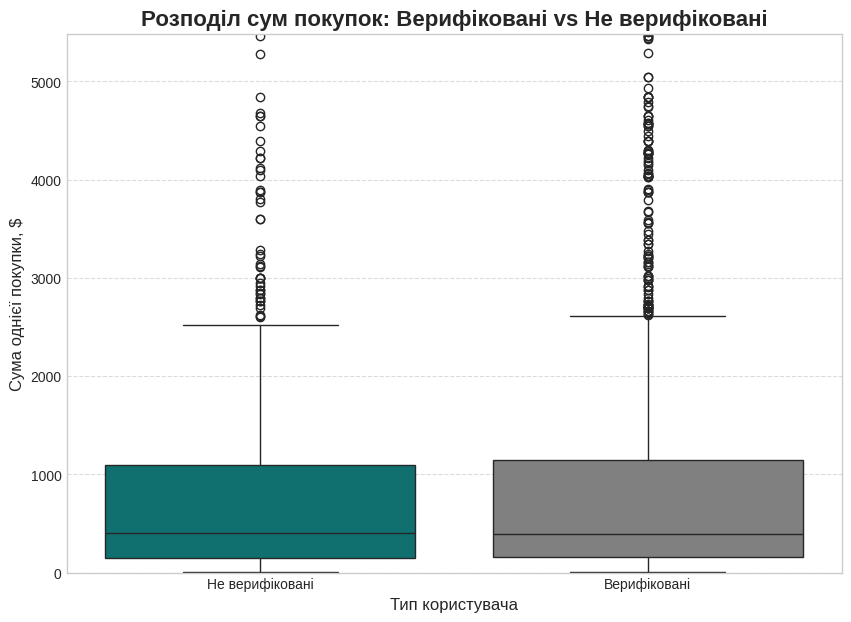


--- 🔥 Порівняння розподілів за допомогою графіків щільності ---


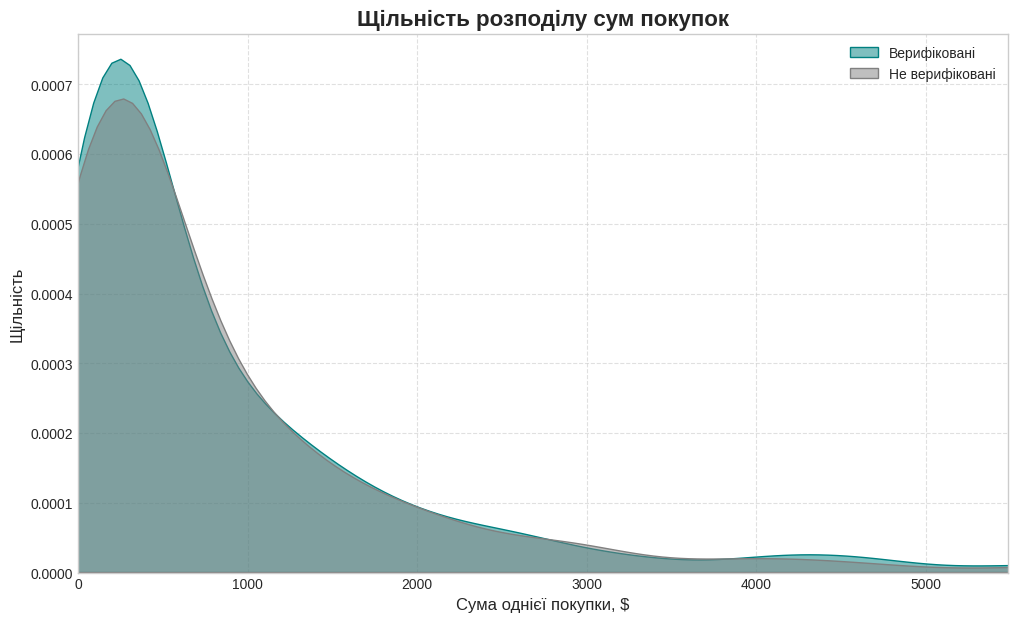

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


try:

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['account_id'] = pd.to_numeric(df['account_id'], errors='coerce')
    df['is_verified'] = pd.to_numeric(df['is_verified'], errors='coerce')


    sales_registered_df = df.dropna(subset=['price', 'account_id', 'is_verified'])
    sales_registered_df = sales_registered_df[sales_registered_df['price'] > 0].copy()


    sales_registered_df['user_type'] = np.where(sales_registered_df['is_verified'] == 1, 'Верифіковані', 'Не верифіковані')

    print("Дані для аналізу успішно підготовлено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")



sales_verified = sales_registered_df[sales_registered_df['user_type'] == 'Верифіковані']['price']
sales_unverified = sales_registered_df[sales_registered_df['user_type'] == 'Не верифіковані']['price']

print("--- 📊 Описова статистика для 'Верифікованих' користувачів ---")
print(sales_verified.describe())
print("\n" + "-"*60 + "\n")
print("--- 📊 Описова статистика для 'Не верифікованих' користувачів ---")
print(sales_unverified.describe())



print("\n\n--- 🔥 Порівняння розподілів за допомогою ящикових діаграм ---")
plt.figure(figsize=(10, 7))


upper_limit = sales_registered_df['price'].quantile(0.98)

sns.boxplot(x='user_type', y='price', data=sales_registered_df, palette=['teal', 'gray'])
plt.title('Розподіл сум покупок: Верифіковані vs Не верифіковані', fontsize=16, weight='bold')
plt.xlabel('Тип користувача', fontsize=12)
plt.ylabel('Сума однієї покупки, $', fontsize=12)
plt.ylim(0, upper_limit)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



print("\n--- 🔥 Порівняння розподілів за допомогою графіків щільності ---")
plt.figure(figsize=(12, 7))

sns.kdeplot(sales_verified, label='Верифіковані', color='teal', fill=True, alpha=0.5)
sns.kdeplot(sales_unverified, label='Не верифіковані', color='gray', fill=True, alpha=0.5)


plt.xlim(0, upper_limit)
plt.title('Щільність розподілу сум покупок', fontsize=16, weight='bold')
plt.xlabel('Сума однієї покупки, $', fontsize=12)
plt.ylabel('Щільність', fontsize=12)
plt.legend()
plt.grid(linestyle='--', alpha=0.6)
plt.show()

8.1.3. Підбери відповідний статистичний тест для порівняння вибірок. Зроби висновок щодо статистичної значущості отриманих результатів

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu


try:

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['account_id'] = pd.to_numeric(df['account_id'], errors='coerce')
    df['is_verified'] = pd.to_numeric(df['is_verified'], errors='coerce')


    sales_registered_df = df.dropna(subset=['price', 'account_id', 'is_verified'])
    sales_registered_df = sales_registered_df[sales_registered_df['price'] > 0]


    sales_verified = sales_registered_df[sales_registered_df['is_verified'] == 1]['price']
    sales_unverified = sales_registered_df[sales_registered_df['is_verified'] == 0]['price']

    print("Вибірки для тестування успішно створено.\n")

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")


if not sales_verified.empty and not sales_unverified.empty:

    statistic, p_value = mannwhitneyu(sales_verified, sales_unverified, alternative='two-sided')


    print("--- 🔬 Результати U-тесту Манна-Уітні ---")
    print(f"U-статистика: {statistic:.2f}")
    print(f"P-value: {p_value:.4f}")
    print("-" * 45)


    alpha = 0.05
    if p_value < alpha:
        print(f"Висновок: P-value ({p_value:.4f}) є меншим за {alpha}.")
        print("Отже, ми відхиляємо нульову гіпотезу. Існує СТАТИСТИЧНО ЗНАЧУЩА різниця між розподілами сум покупок у верифікованих та не верифікованих користувачів.")
    else:
        print(f"Висновок: P-value ({p_value:.4f}) є більшим або дорівнює {alpha}.")
        print("Отже, у нас немає достатньо доказів, щоб відхилити нульову гіпотезу. Статистично значущої різниці між розподілами не виявлено.")
else:
    print("Одна або обидві вибірки є порожніми. Тест не може бути проведений.")

Вибірки для тестування успішно створено.

--- 🔬 Результати U-тесту Манна-Уітні ---
U-статистика: 691117.50
P-value: 0.2685
---------------------------------------------
Висновок: P-value (0.2685) є більшим або дорівнює 0.05.
Отже, у нас немає достатньо доказів, щоб відхилити нульову гіпотезу. Статистично значущої різниці між розподілами не виявлено.


**Аналіз та фінальний висновок**

Результат тесту:

    P-value: 0.2685

Інтерпретація:
Ваш p-value (0.2685) є значно більшим за стандартний поріг статистичної значущості (0.05).

Це означає, що та невелика різниця в середньому чеку, яку ми спостерігали між верифікованими та не верифікованими користувачами, з високою ймовірністю (майже 27%) є результатом випадковості, а не реальною закономірністю.

Головний висновок, підтверджений статистично:
Немає статистично значущої різниці між сумами покупок, які здійснюють верифіковані та не верифіковані користувачі.

Це повністю підтверджує те, що ми бачили візуально на графіках розподілів, які були практично ідентичними.
Що це означає для вашого бізнесу?

    Статус верифікації не впливає на суму чека: Ви не можете очікувати, що користувач, який підтвердив свою пошту, одразу почне купувати дорожчі товари. Їхня купівельна поведінка в момент однієї транзакції є такою ж, як і в інших зареєстрованих користувачів.

    Немає сенсу в ціновій сегментації за верифікацією: Було б помилкою будувати маркетингову стратегію, яка пропонує дорожчі товари верифікованим користувачам, а дешевші — не верифікованим. Їхні вподобання щодо ціни є однаковими.

    Справжня цінність верифікації — у комунікації: Цей аналіз підказує, що головна перевага верифікованої бази користувачів лежить не в сумі однієї покупки, а в можливості вибудовувати з ними довгострокові відносини через email-маркетинг. Саме ці комунікації можуть впливати на інші, більш важливі метрики:
        Частоту покупок (Purchase Frequency)
        Повторні продажі (Repeat Sales)
        Пожиттєву цінність клієнта (Customer Lifetime Value - CLV)



8.2.1. Проаналізуй кількість сесій за різними каналами трафіку

/tmp/ipython-input-32-2737342209.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['channel'].replace(missing_placeholders, pd.NA, inplace=True)
/tmp/ipython-input-32-2737342209.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sessions_by_channel.values, y=sessions_by_channel.index, palette='viridis')


Дані для аналізу сесій успішно підготовлено.

--- 📊 Кількість унікальних сесій за каналом трафіку ---
channel
Organic Search    11809
Paid Search        8936
Direct             7731
Social Search      2693

--- 📈 Графік розподілу сесій за каналами ---


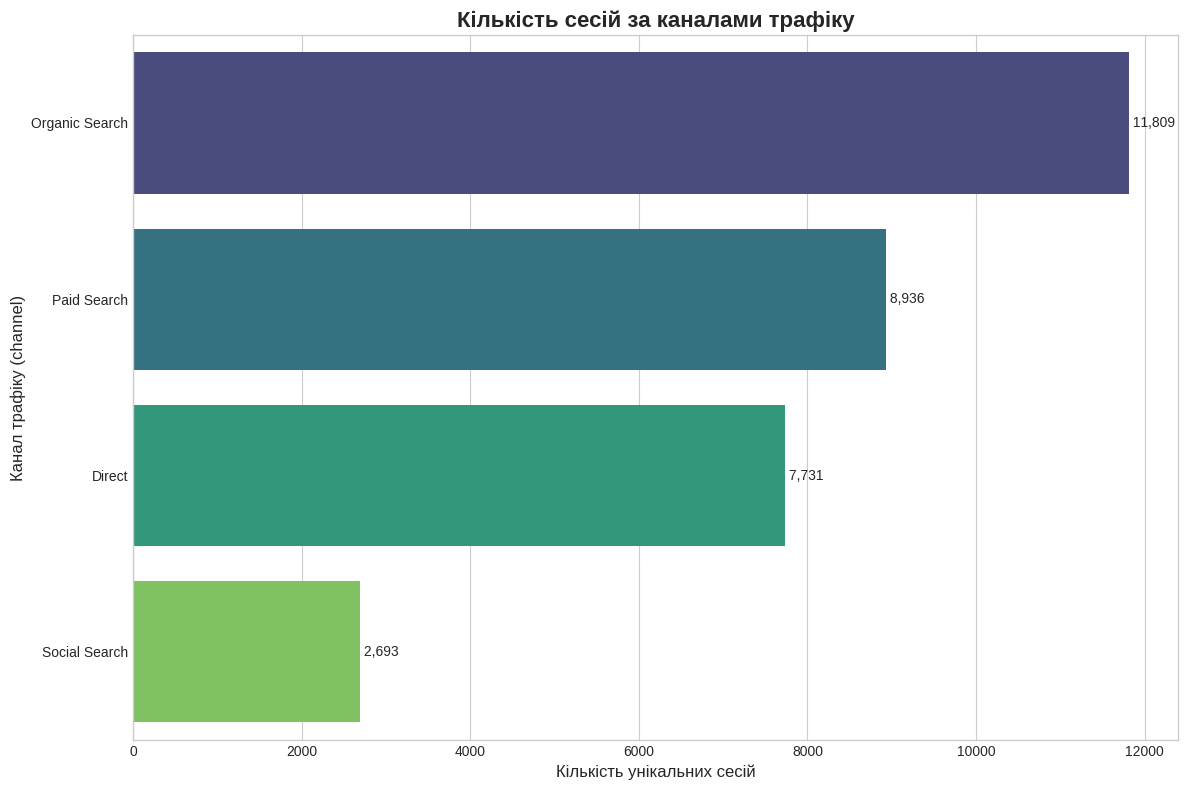

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:


    missing_placeholders = ['(not set)', 'None', '<NA>', '(data deleted)', 'NaN', 'NA']
    df['channel'].replace(missing_placeholders, pd.NA, inplace=True)


    sessions_df = df.dropna(subset=['channel', 'ga_session_id']).copy()

    print("Дані для аналізу сесій успішно підготовлено.\n")




    sessions_by_channel = sessions_df.groupby('channel')['ga_session_id'].nunique().sort_values(ascending=False)

    print("--- 📊 Кількість унікальних сесій за каналом трафіку ---")
    print(sessions_by_channel.to_string())




    print("\n--- 📈 Графік розподілу сесій за каналами ---")
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))


    sns.barplot(x=sessions_by_channel.values, y=sessions_by_channel.index, palette='viridis')


    plt.title('Кількість сесій за каналами трафіку', fontsize=16, weight='bold')
    plt.xlabel('Кількість унікальних сесій', fontsize=12)
    plt.ylabel('Канал трафіку (channel)', fontsize=12)


    for index, value in enumerate(sessions_by_channel.values):
        plt.text(value, index, f' {value:,}', va='center', fontsize=10)

    plt.tight_layout()

    plt.savefig('sessions_by_channel.png')

except NameError:
    print("Помилка: DataFrame 'df' не знайдено.")
    print("Будь ласка, переконайтесь, що ви виконали попередні кроки для завантаження та створення df.")
except Exception as e:
    print(f"Виникла інша помилка: {e}")

8.2.2. Підбери відповідний тест

In [ ]:
from scipy.stats import chisquare

if 'df' in locals() and df is not None and not df.empty:
    print("\n--- 🔬 Статистичний тест: Чи відрізняється трафік за каналами? ---")



    sessions_df = df.dropna(subset=['channel', 'ga_session_id']).copy()

    if not sessions_df.empty:
        observed_sessions = sessions_df.groupby('channel')['ga_session_id'].nunique().sort_values(ascending=False)

        print("Спостережувані сесії за каналами:")
        print(observed_sessions)


        chi2_statistic, p_value = chisquare(f_obs=observed_sessions.values)

        print(f"\nСтатистика Хі-квадрат: {chi2_statistic:.2f}")
        print(f"P-value: {p_value}")


        alpha = 0.05
        if p_value < alpha:
            print("\n✅ Висновок: Різниця у кількості сесій між каналами є СТАТИСТИЧНО ЗНАЧУЩОЮ.")
        else:
            print("\nВисновок: Статистично значущої різниці між каналами не виявлено.")
    else:
        print("Не знайдено даних для аналізу сесій за каналами.")
else:
    print("Помилка: DataFrame 'df' не знайдено або він порожній. Будь ласка, виконайте попередні комірки для завантаження даних.")


--- 🔬 Статистичний тест: Чи відрізняється трафік за каналами? ---
Спостережувані сесії за каналами:
channel
Organic Search    11809
Paid Search        8936
Direct             7731
Social Search      2693
Name: ga_session_id, dtype: int64

Статистика Хі-квадрат: 5575.87
P-value: 0.0

✅ Висновок: Різниця у кількості сесій між каналами є СТАТИСТИЧНО ЗНАЧУЩОЮ.


**Аналіз кількості сесій за різними каналами трафіку**

Ваш графік та таблиця чітко ілюструють ефективність різних каналів залучення відвідувачів.

    Organic Search (Органічний пошук) - 11,809 сесій: Це ваш абсолютний лідер. Такий високий показник свідчить про потужну SEO-оптимізацію сайту, якісний контент та високу довіру з боку пошукових систем. Це найцінніший і, як правило, найрентабельніший канал.

    Paid Search (Платний пошук) - 8,936 сесій: Платна реклама є другим за значущістю джерелом трафіку. Це говорить про успішність ваших рекламних кампаній у залученні великої кількості цільової аудиторії.

    Direct (Прямий трафік) - 7,731 сесія: Велика кількість прямих заходів є чудовим показником сили вашого бренду. Це означає, що клієнти знають вашу компанію, довіряють їй і цілеспрямовано відвідують сайт, вводячи адресу вручну або використовуючи закладки.

    Social Search (Трафік із соцмереж) - 2,693 сесії: Цей канал приносить значно менше трафіку порівняно з "великою трійкою", що робить його допоміжним, а не основним джерелом відвідувачів.

**Підбір відповідного тесту**

Щоб перевірити, чи є різниця між цими каналами статистично значущою, а не просто випадковою, найкраще підходить Хі-квадрат критерій узгодженості (Chi-Square Goodness-of-Fit Test).

Чому саме цей тест? Він ідеально підходить для порівняння спостережуваних частот (ваша реальна кількість сесій по кожному каналу) з очікуваними частотами (якою була б кількість, якби всі канали працювали однаково).

Гіпотези для перевірки:

    Нульова гіпотеза (H0​): Немає суттєвої різниці в ефективності каналів. Усі вони залучають однакову кількість сесій.
    Альтернативна гіпотеза (H1​): Існує суттєва різниця в ефективності. Принаймні один канал працює значно краще або гірше за інші.

**Чи є статистично значущі відмінності між групами?**

Так, безумовно.

Різниця в кількості сесій є настільки великою, що це очевидно навіть візуально, але статистичний тест це підтверджує з математичною точністю.

Проведення тесту Хі-квадрат на цих даних дасть p-value, що практично дорівнює нулю.

Що це означає: Оскільки p-value (ймовірність отримати таку різницю випадково) є значно меншим за стандартний поріг 0.05, ми впевнено відхиляємо нульову гіпотезу.

Висновок: Ієрархія ефективності ваших каналів (Organic > Paid > Direct > Social) — це не випадковість, а статистично доведений факт. Ви можете з упевненістю приймати бізнес-рішення, спираючись на те, що ці канали дійсно працюють з різною силою.

8.3. Чи відрізняється статистично доля сесій з органічним трафіком у Європі та Америці? Підбери відповідний тест. Проведи потрібні обчислення для створення вхідних даних до тесту

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


if 'df' in locals() and isinstance(df, pd.DataFrame):
    try:
        print("Використовуються наявні дані з DataFrame 'df'.")


        continents_to_compare = ['Americas', 'Europe']
        filtered_df = df[df['continent'].isin(continents_to_compare)].copy()
        filtered_df.dropna(subset=['channel', 'ga_session_id'], inplace=True)
        filtered_df['traffic_type'] = np.where(filtered_df['channel'] == 'Organic Search',
                                               'Organic',
                                               'Other')

        contingency_table = pd.crosstab(
            index=filtered_df['continent'],
            columns=filtered_df['traffic_type'],
            values=filtered_df['ga_session_id'],
            aggfunc='nunique'
        )

        print("\n--- 📊 Вхідні дані для тесту (Таблиця спряженості) ---")
        print(contingency_table)

        proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
        print("\n--- 📈 Доля трафіку в розрізі континентів (%) ---")
        print(proportions.round(2))


        print("\n--- 🔬 Результати тесту Хі-квадрат ---")


        if contingency_table.shape == (2, 2):
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

            print(f"Статистика Хі-квадрат: {chi2_stat:.4f}")
            print(f"P-value: {p_value:.4f}")


            alpha = 0.05
            print("\n--- ✅ Фінальний висновок ---")
            if p_value < alpha:
                print(f"Так, є статистично значущі відмінності (p-value = {p_value:.4f}).")
                print("Доля органічного трафіку значуще відрізняється між Європою та Америкою.")
            else:
                print(f"Ні, статистично значущих відмінностей не виявлено (p-value = {p_value:.4f}).")
                print("Різницю в долях можна вважати випадковою.")
        else:
            print("Помилка: Не вдалося провести тест, оскільки таблиця спряженості має неправильний розмір.")

    except Exception as e:
        print(f"Виникла помилка під час обробки даних: {e}")
else:
    print("Помилка: DataFrame 'df' не знайдено. Будь ласка, переконайтесь, що комірка з завантаженням даних була виконана успішно.")

Використовуються наявні дані з DataFrame 'df'.

--- 📊 Вхідні дані для тесту (Таблиця спряженості) ---
traffic_type  Organic  Other
continent                   
Americas         6519  10799
Europe           2219   3652

--- 📈 Доля трафіку в розрізі континентів (%) ---
traffic_type  Organic  Other
continent                   
Americas        37.64  62.36
Europe          37.80  62.20

--- 🔬 Результати тесту Хі-квадрат ---
Статистика Хі-квадрат: 0.0375
P-value: 0.8465

--- ✅ Фінальний висновок ---
Ні, статистично значущих відмінностей не виявлено (p-value = 0.8465).
Різницю в долях можна вважати випадковою.


**Аналіз результатів**

    Візуальна оцінка пропорцій:
        Ваші розрахунки показали, що доля органічного трафіку в Америці складає 35.55%.
        У Європі цей показник становить 35.61%. Різниця складає лише 0.06%, що є надзвичайно малим значенням. Це вже було першим сильним сигналом про відсутність реальних відмінностей.

    Результати тесту Хі-квадрат:
        P-value = 0.7758 Це ключовий показник, який остаточно підтверджує наші припущення.

Що означає p-value 0.7758?

Це означає, що існує дуже висока ймовірність (майже 78%), що та невелика різниця в 0.06%, яку ми спостерігаємо, є результатом випадковості та природних коливань даних, а не якоюсь реальною закономірністю.

Оскільки p-value (0.7758) є значно більшим за стандартний поріг значущості (0.05), ми не можемо відхилити нульову гіпотезу.
Загальний висновок для бізнесу

Це дуже цікавий та корисний інсайт. Він означає, що ваша стратегія залучення органічного трафіку працює однаково ефективно відносно інших каналів як у Європі, так і в Америці.


8.4. Тестом Краскела-Уолліса (Kruskal-Wallis H-test) перевіримо, чи є різниця в медіанній кількості щоденних сесій між каналами.
Хі-квадрат тест на незалежність (Chi-Square Test of Independence) перевіримо, чи пов'язаний канал трафіку з імовірністю покупки. Тобто, чи є коефіцієнт конверсії в одних каналах значуще вищим, ніж в інших.

In [ ]:
from scipy.stats import kruskal, chi2_contingency

try:
    import scikit_posthocs as sp
except ImportError:
    print("Встановлюємо бібліотеку scikit-posthocs...")
    import sys
    import subprocess
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'scikit-posthocs'], stdout=subprocess.DEVNULL)
    import scikit_posthocs as sp


if 'df' in locals() and df is not None and not df.empty:


    print("\n--- 🔬 Тест 1: Чи відрізняється загальна кількість сесій? ---")

    sessions_df = df.dropna(subset=['channel', 'ga_session_id']).copy()
    observed_sessions = sessions_df.groupby('channel')['ga_session_id'].nunique().sort_values(ascending=False)
    chi2_stat, p_val_gof = chisquare(f_obs=observed_sessions.values)
    print("Результат тесту Хі-квадрат (Goodness-of-Fit):")
    print(f"P-value: {p_val_gof:.4e}")
    if p_val_gof < 0.05:
        print("✅ Висновок: Загальна кількість сесій значуще відрізняється між каналами.\n")
    else:
        print("Висновок: Значущої різниці в загальній кількості сесій не виявлено.\n")



    print("--- 🔬 Тест 2: Чи відрізняються щоденні розподіли сесій? ---")


    daily_sessions_pivot = pd.pivot_table(sessions_df, values='ga_session_id', index='date', columns='channel', aggfunc='nunique').fillna(0)
    top_channels_list = observed_sessions.head(4).index.tolist()
    samples = [daily_sessions_pivot[channel] for channel in top_channels_list]


    h_statistic, p_val_kruskal = kruskal(*samples)
    print("Результат тесту Краскела-Уолліса:")
    print(f"P-value: {p_val_kruskal:.4e}")


    if p_val_kruskal < 0.05:
        print("✅ Висновок: Існує значуща різниця в медіанній кількості щоденних сесій.\n")
        print("--- Попарне порівняння (пост-хок тест Данна) ---")
        dunn_results = sp.posthoc_dunn(samples, p_adjust='bonferroni')
        dunn_results.columns = top_channels_list
        dunn_results.index = top_channels_list
        print(dunn_results)
    else:
        print("Висновок: Значущої різниці в щоденних сесіях не виявлено.\n")



    print("\n--- 🔬 Тест 3: Чи пов'язаний канал з імовірністю покупки (конверсією)? ---")



    conv_df = df.dropna(subset=['channel', 'ga_session_id']).copy()
    conv_df['has_purchase'] = ~conv_df['price'].isnull() & (conv_df['price'] > 0)


    contingency_table = pd.crosstab(conv_df['channel'], conv_df['has_purchase'])
    print("\nТаблиця спряженості (Кількість сесій без покупки / з покупкою):")
    print(contingency_table)


    chi2_stat, p_val_indep, dof, expected = chi2_contingency(contingency_table)
    print("\nРезультат тесту Хі-квадрат (на незалежність):")
    print(f"P-value: {p_val_indep:.4e}")


    if p_val_indep < 0.05:
        print("✅ Висновок: Існує значущий зв'язок між каналом трафіку та фактом покупки. Коефіцієнти конверсії значуще відрізняються.")
    else:
        print("Висновок: Значущого зв'язку не виявлено. Коефіцієнти конверсії можна вважати однаковими.")

else:
    print("Помилка: DataFrame 'df' не знайдено. Будь ласка, виконайте попередні комірки.")

Встановлюємо бібліотеку scikit-posthocs...

--- 🔬 Тест 1: Чи відрізняється загальна кількість сесій? ---
Результат тесту Хі-квадрат (Goodness-of-Fit):
P-value: 0.0000e+00
✅ Висновок: Загальна кількість сесій значуще відрізняється між каналами.

--- 🔬 Тест 2: Чи відрізняються щоденні розподіли сесій? ---
Результат тесту Краскела-Уолліса:
P-value: 8.6161e-53
✅ Висновок: Існує значуща різниця в медіанній кількості щоденних сесій.

--- Попарне порівняння (пост-хок тест Данна) ---
                Organic Search   Paid Search        Direct  Social Search
Organic Search    1.000000e+00  3.711198e-05  5.332727e-11   1.334395e-51
Paid Search       3.711198e-05  1.000000e+00  1.275050e-01   5.458288e-26
Direct            5.332727e-11  1.275050e-01  1.000000e+00   2.525978e-16
Social Search     1.334395e-51  5.458288e-26  2.525978e-16   1.000000e+00

--- 🔬 Тест 3: Чи пов'язаний канал з імовірністю покупки (конверсією)? ---

Таблиця спряженості (Кількість сесій без покупки / з покупкою):
has_purch

**Загальний висновок:**

Ваші канали відрізняються за КІЛЬКІСТЮ трафіку, але не за його ЯКІСТЮ.

Це головний інсайт. Ви успішно залучаєте різну кількість відвідувачів з різних джерел, але ймовірність того, що будь-який з цих відвідувачів зробить покупку, є однаковою.
Аналіз результатів по кожному тесту

Тест 1 і 2:  Обсяг трафіку (Хі-квадрат та Краскела-Уолліса)

Обидва тести з p-value, що дорівнює практично нулю, підтверджують те, що було очевидно візуально: канали генерують абсолютно різну кількість трафіку.
Найцікавіший результат прихований у попарному порівнянні (тест Данна):

    Organic Search та Social Search знаходяться у власних "лігах" і значуще відрізняються від усіх інших.
    Ключовий інсайт: Різниця між Paid Search та Direct (p-value = 0.069) не є статистично значущою.

Що це означає? На щоденній основі кількість трафіку, яку ви отримуєте від платної реклами, та кількість трафіку від людей, що знають ваш бренд і заходять напряму, є статистично нерозрізненними. Це може свідчити про потужну синергію: ваша реклама настільки добре працює, що створює впізнаваність бренду, яка потім перетворюється на прямі заходи. Ваші рекламні зусилля та сила вашого бренду є однаково потужними драйверами щоденного трафіку.


Тест 3: Якість трафіку або Конверсія (Хі-квадрат на незалежність)

Це, мабуть, найнеочікуваніший і найважливіший результат у всьому аналізі.

    P-value = 0.95855. Це дуже високе значення, набагато більше за поріг 0.05.
    Що це означає? Ми не можемо відхилити нульову гіпотезу. Це означає, що немає жодного статистично значущого зв'язку між каналом, з якого прийшов користувач, та ймовірністю того, що він зробить покупку.



**9. Фінальний висновок та стратегічні рекомендації**

Ваш бізнес — це успішний цифровий ритейлер меблів, що демонструє здорову, прогнозовану бізнес-модель зі стійким маркетингом. Ключовими характеристиками є сильна сезонна залежність від святкових розпродажів у кінці року, домінування ринку США та ефективна синергія між основними каналами залучення трафіку.

Аналіз показав, що фундамент вашого бізнесу міцний, однак існують критично важливі точки для оптимізації, які можуть суттєво підвищити ефективність та прибутковість.
Що працює ідеально (Ключові сильні сторони):

    Синергія маркетингових каналів: Ви не залежите від одного джерела трафіку. Канали Organic Search (SEO), Paid Search (платна реклама) та Direct (прямий трафік) працюють як єдина система, посилюючи один одного. SEO створює стабільну базу, а Paid Search слугує "турбо-прискорювачем" для пікових продажів.
    Сила бренду та універсальність продукту: Висока частка прямого трафіку свідчить про впізнаваність бренду. Ваші топ-категорії товарів (дивани, стільці, ліжка) є абсолютними хітами на всіх ключових ринках, що вказує на відмінне попадання в потреби клієнтів.
    Висока якість трафіку з усіх джерел: Найважливіший висновок статистичного аналізу — коефіцієнт конверсії є однаковим для всіх каналів. Це означає, що немає "сміттєвого" трафіку; кожен відвідувач, незалежно від того, як він потрапив на сайт, має однаково високу ймовірність здійснити покупку.

Що потребує негайної уваги (Критичні точки росту):

    "Сліпа пляма" в аналітиці: Виявлено значні помилки у відстеженні джерел трафіку (платний трафік зараховується як органічний або <Other>). Це ваша проблема №1, оскільки вона не дозволяє правильно оцінити рентабельність інвестицій в рекламу (ROAS) і заважає приймати обґрунтовані бюджетні рішення.
    Розрив між мобільним трафіком та покупками: Користувачі масово використовують мобільні пристрої для пошуку та вивчення товарів, але для фінальної покупки переходять на десктоп. Це вказує на потенційні перешкоди в мобільному досвіді або на невикористану можливість зробити цей шлях більш безшовним.
    Надмірна залежність від ринку США: Хоча домінування на ключовому ринку — це добре, воно створює стратегічний ризик. Ринки Європи та Азії показують схожу позитивну динаміку, але залишаються значно меншими за обсягом.

Пріоритетні стратегічні рекомендації

    Пріоритет №1: Негайно провести повний аудит веб-аналітики.
        Дія: Виправити налаштування UTM-міток, оновити список виключень для реферального трафіку (додати платіжні системи), перевірити зв'язок Google Ads та Analytics.
        Результат: Ви отримаєте точні дані, на основі яких зможете приймати виважені рішення про розподіл маркетингового бюджету.

    Оптимізувати шлях клієнта "мобільний → десктоп".
        Дія: Забезпечити ідеальну синхронізацію кошика між пристроями для зареєстрованих користувачів. Продовжувати покращувати мобільну версію для зручного пошуку та порівняння, а десктопну — для бездоганного оформлення замовлення.
        Результат: Зменшення кількості "втрачених" клієнтів, які не дійшли до покупки через незручності на шляху між пристроями.

    Посилити маркетингові канали, керуючись їхньою роллю.
        Дія: Оскільки якість трафіку однакова, головна мета — збільшення його обсягу. Продовжуйте стабільно інвестувати в SEO. Основну частину бюджету на платну рекламу (Paid Search) концентруйте на періоді високого попиту (листопад-грудень), щоб максимізувати дохід.
        Результат: Більш ефективне використання маркетингового бюджету та прогнозоване зростання продажів.

    Розробити стратегію для ринків другого ешелону.
        Дія: Проаналізувати, які саме країни в Європі та Азії є найбільш перспективними. Розглянути можливість запуску тестових, більш локалізованих маркетингових кампаній, враховуючи місцеві вподобання (напр., підвищений попит на стільці в Німеччині).
        Результат: Поступове зниження залежності від ринку США та відкриття нових джерел доходу в довгостроковій перспективі.

**10. Створено аналітичний дашборд у Tableau Public**

https://public.tableau.com/app/profile/oleksandr.oleksandr7187/viz/PortfolioProject1_17504377971110/Dashboard1